# **Project Name**    -



##### **Project Type**    - Predicting Customer Satisfaction
##### **Contribution**    - Team
##### **Team Member 1 -**Yogesh
##### **Team Member 2 -**Yashvardhan
##### **Team Member 3 -**Anushka
##### **Team Member 4 -**Yug

# **Project Summary -**

The overarching objective of this project is to develop a comprehensive framework that integrates predictive analytics, advanced data mining techniques, and personalized service delivery to optimize airline customer satisfaction. By leveraging historical data and real-time insights, the aim is to predict customer satisfaction levels accurately and tailor services to meet individual preferences and needs.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**
Enhancing Airline Customer Satisfaction through Predictive Analytics and Personalized Services In the fiercely competitive airline industry, customer satisfaction is paramount for sustained success. Airlines face the challenge of not only meeting customer expectations but also exceeding them to foster loyalty and positive brand perception. To address this challenge, leveraging predictive analytics and personalized services can significantly enhance the overall passenger experience.

**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

!pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm
target_colors=['#8b324d','#387149']

### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/train.csv.zip')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Dataset First View

In [ ]:
# Dataset First Look
df

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=True,cmap="coolwarm")
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05,1.010540e+05
mean,-1.827439e-16,-1.590484e-16,1.069815e-16,-3.199601e-16,-1.680485e-17,-5.528022e-16,5.320246e-16,-6.922332e-17,2.820261e-16,-1.312747e-16,1.843963e-16,2.343714e-16,1.727595e-16,2.251428e-16,-2.594556e-16,1.776111e-16,1.125011e-16,3.895350e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.259029e+00,-3.051492e+00,-2.200263e+00,-1.897619e+00,-2.064307e+00,-2.447839e+00,-2.397630e+00,-2.080765e+00,-1.691550e+00,-2.174143e+00,-1.712672e+00,-2.223640e+00,-1.868610e+00,-1.712176e+00,-1.883975e+00,-2.248908e+00,-8.158228e-01,-8.250563e-01
25%,-8.060588e-01,-7.664098e-01,-5.211130e-01,-7.270341e-01,-5.180067e-01,-7.509388e-01,-9.104641e-01,-9.755311e-01,-1.129521e+00,-1.046820e+00,-1.104754e+00,-1.040103e+00,-6.725360e-01,-3.070918e-01,-7.014134e-01,-1.000118e+00,-8.158228e-01,-8.250563e-01
50%,6.379396e-02,-1.228898e-02,2.321887e-01,-7.658840e-02,1.967098e-01,3.887544e-02,-1.594347e-01,-2.659784e-01,3.627117e-01,4.418039e-01,4.324193e-01,4.669829e-01,2.162220e-01,-3.070918e-01,1.949706e-01,-2.656933e-01,-8.158228e-01,-8.250563e-01
75%,7.744011e-01,8.176926e-01,9.523372e-01,6.037133e-01,8.884136e-01,8.054646e-01,5.947489e-01,5.245746e-01,1.269276e+00,4.418039e-01,4.324193e-01,4.669829e-01,1.297306e+00,5.210051e-01,1.296555e+00,5.215643e-01,1.133592e+00,1.128039e+00
max,2.572882e+00,1.854432e+00,1.647123e+00,1.308795e+00,1.562315e+00,1.554040e+00,1.351456e+00,1.386312e+00,1.269276e+00,1.286250e+00,1.336024e+00,1.307815e+00,1.297306e+00,1.417654e+00,1.296555e+00,1.353658e+00,1.662570e+00,1.659014e+00


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    74
Type of Travel                          2
Class                                   3
Flight Distance                      3793
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  6
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        5
Cleanliness                             6
Departure Delay in Minutes            130
Arrival Delay in Minutes              132
satisfaction                            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# # Write your code to make your dataset analysis ready.
# df.dropna(inplace=True)
# df.fillna(df.mode(), inplace=True)
# df.drop_duplicates(inplace=True)
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


# Drop rows with missing values
df.dropna(inplace=True)

# Impute missing values in numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Encode categorical variables if needed (e.g., one-hot encoding)
# categorical_cols = df.select_dtypes(include=['object']).columns
# df = pd.get_dummies(df, columns=categorical_cols)

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)


### What all manipulations have you done and insights you found?

    Handling Missing Values:
        The dropna(inplace=True) method is used to remove rows with missing values. This can be effective if the number of missing values is relatively small compared to the overall dataset.

    Filling Missing Values with Mean values/Imputing missing values:
        The fillna(df.mean(), inplace=True) method is employed to fill missing values with the mean of each respective column. Imputing missing values with the mean is a common strategy, especially for numerical features. It helps retain data integrity while filling in gaps.

    Removing Duplicate Rows:
        The drop_duplicates(inplace=True) method is used to remove duplicate rows from the dataset. Removing duplicates ensures that each observation is unique, preventing biases in analysis.

    Normalizing Numerical Columns:
        The code identifies numerical columns using select_dtypes and then uses the MinMaxScaler to normalize these columns. Normalization scales numerical features to a standard range (typically between 0 and 1). This is essential for machine learning algorithms that are sensitive to the scale of input features.  

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

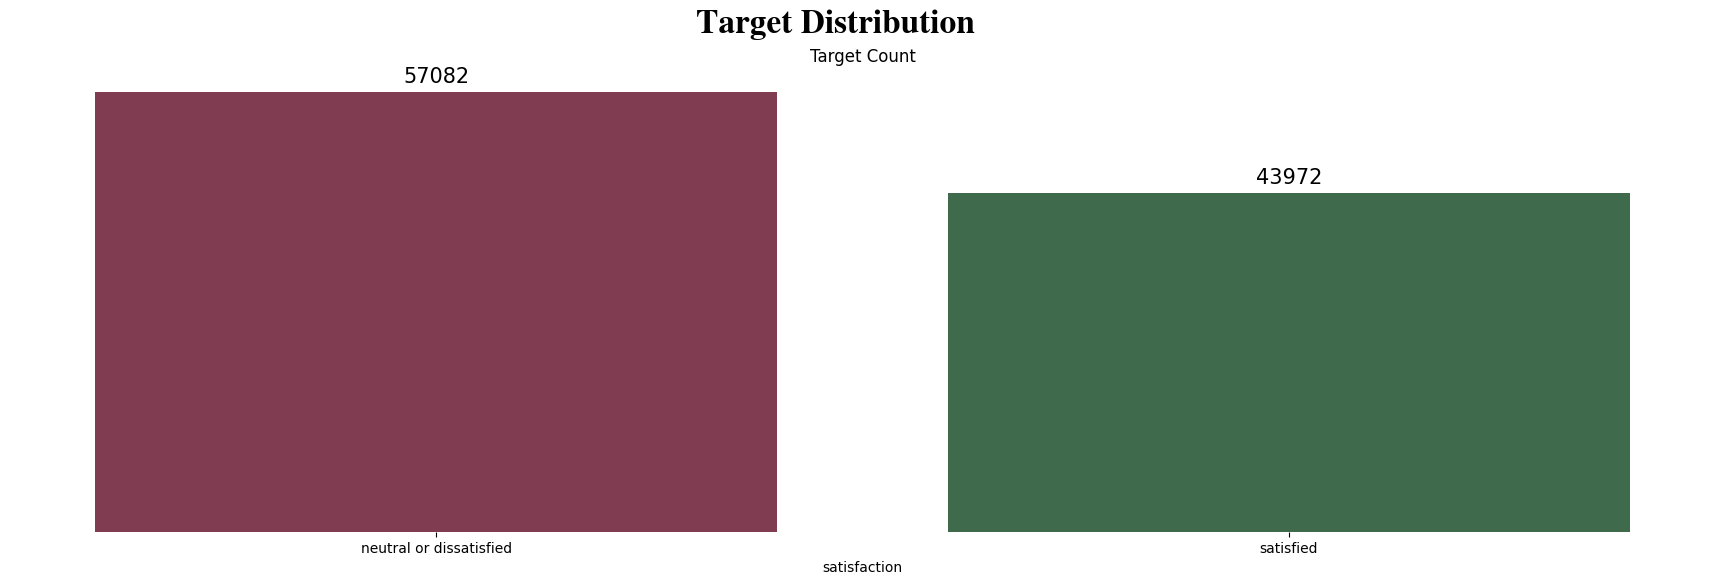

In [ ]:
# Chart - 1 visualization code

# Countplot
# Defining the figure
fig = plt.figure(figsize=(22, 6))
plt.suptitle('Target Distribution',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=1,ncols=1,figure=fig)
# creating First subplot by defining axis
ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Target Count')
#with the help of seaborn,we are drawing the countplot
sns.countplot(x='satisfaction',data=df,ax=ax1,hue='satisfaction',palette=target_colors)
# To remove the border of the plot
for spine in ax1.spines.values():
  spine.set_visible(False)
# To disappera the y axis
ax1.get_yaxis().set_visible(False)
# to show no above bars
for index, value in enumerate(df['satisfaction'].value_counts()):
  ax1.annotate(value, xy=(index, value + 2000), ha='center', va='center', fontsize=15)

plt.show()


##### 1. Why did you pick the specific chart?
The specific chart chosen is a count plot, which is suitable for visualizing the distribution of categorical data, particularly when the goal is to understand the frequency of each category. In this case, the target variable is 'satisfaction', which is likely a categorical variable with different levels. A count plot allows us to easily observe the distribution of satisfaction levels in the dataset.

Answer Here.

##### 2. What is/are the insight(s) found from the chart?
-The count plot reveals the distribution of satisfaction levels across the dataset.

-It provides insight into the balance or imbalance of satisfaction levels. For example, it helps in understanding whether the dataset contains roughly equal numbers of satisfied and dissatisfied customers, or if there is a significant imbalance between the two.

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the distribution of satisfaction levels can help businesses identify areas of strength and weakness in their products or services. If the majority of customers are satisfied, it indicates that the business is meeting their needs effectively. This can lead to increased customer loyalty, positive word-of-mouth, and improved brand reputation.

Negative Impact: If the count plot reveals a disproportionately high number of dissatisfied customers compared to satisfied ones, it could indicate underlying issues with the product, service, or customer experience. This insight can help businesses identify areas for improvement and take corrective actions to address customer concerns. Failing to address these issues may result in negative growth, such as loss of customers, decreased revenue, and damage to the brand's reputation.

#### Chart - 2

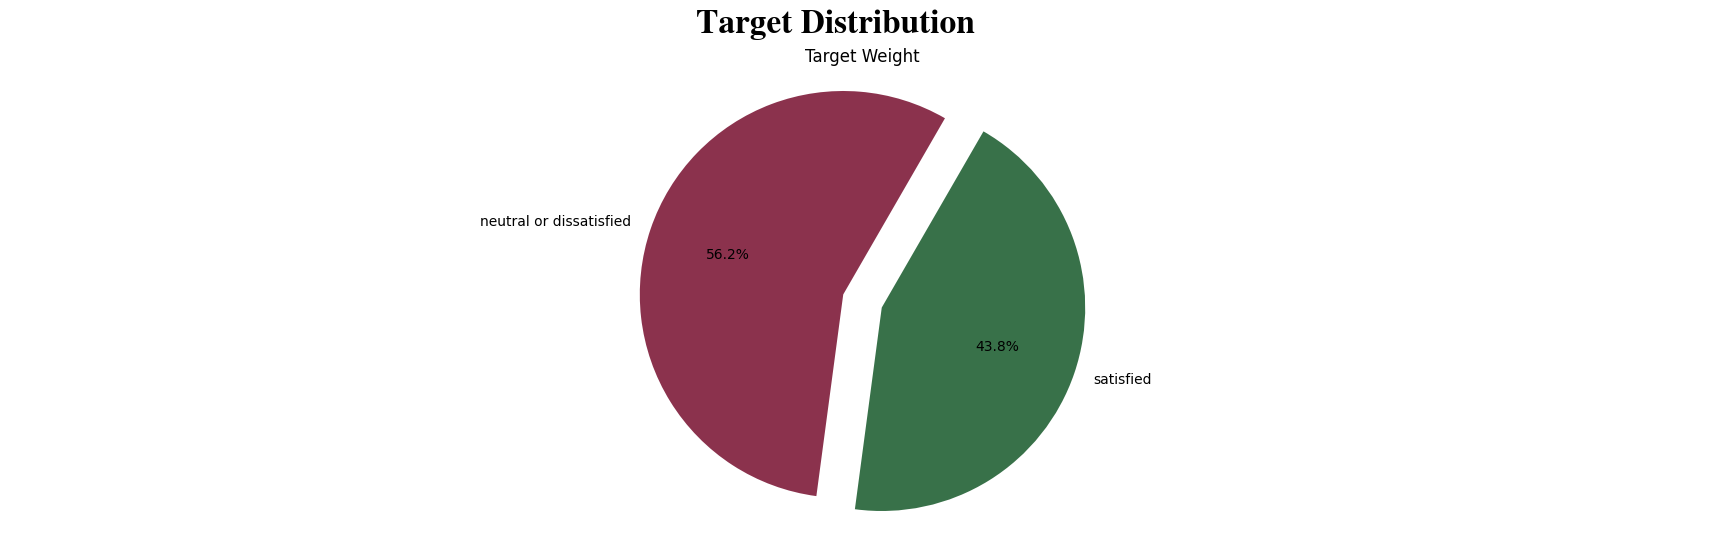

In [ ]:
# Chart - 2 visualization code
# Piechart
# Defining the figure
fig = plt.figure(figsize=(22, 6))
plt.suptitle('Target Distribution',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=1,ncols=1,figure=fig)
# second subplot
ax2=fig.add_subplot(grid[0,:1])
ax2.set_title('Target Weight')
lable=list(df['satisfaction'].value_counts().index)
value=list(df['satisfaction'].value_counts().values)

# pie chart
ax2.pie(value,labels=lable,autopct='%1.1f%%',explode=(0,0.2),startangle=60,colors=target_colors)
ax2.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?
The specific chart chosen is a pie chart, which is suitable for visualizing the proportion of different categories within a dataset. In this case, the pie chart aims to represent the distribution of satisfaction levels ('satisfied' and 'dissatisfied') among the customers.

##### 2. What is/are the insight(s) found from the chart?

-The pie chart provides a visual representation of the distribution of satisfaction levels among the customers.

-It shows the proportion of satisfied and dissatisfied customers relative to the total number of customers in the dataset.

-The chart highlights the relative balance or imbalance between satisfied and dissatisfied customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The insights gained from the pie chart can help businesses understand the overall satisfaction level of their customers. If the majority of the pie represents satisfied customers, it indicates that the business is meeting customer expectations and delivering satisfactory products or services. This can lead to positive business outcomes such as customer loyalty, repeat purchases, and positive word-of-mouth.

Negative Impact: Conversely, if the pie chart shows a significant portion of dissatisfied customers, it suggests areas of improvement in the products, services, or customer experience. Addressing these issues promptly can help prevent negative consequences such as customer churn, negative reviews, and damage to the brand reputation. Ignoring customer dissatisfaction may lead to negative growth, including loss of customers and revenue, as well as a decline in brand perception

#### Chart - 3

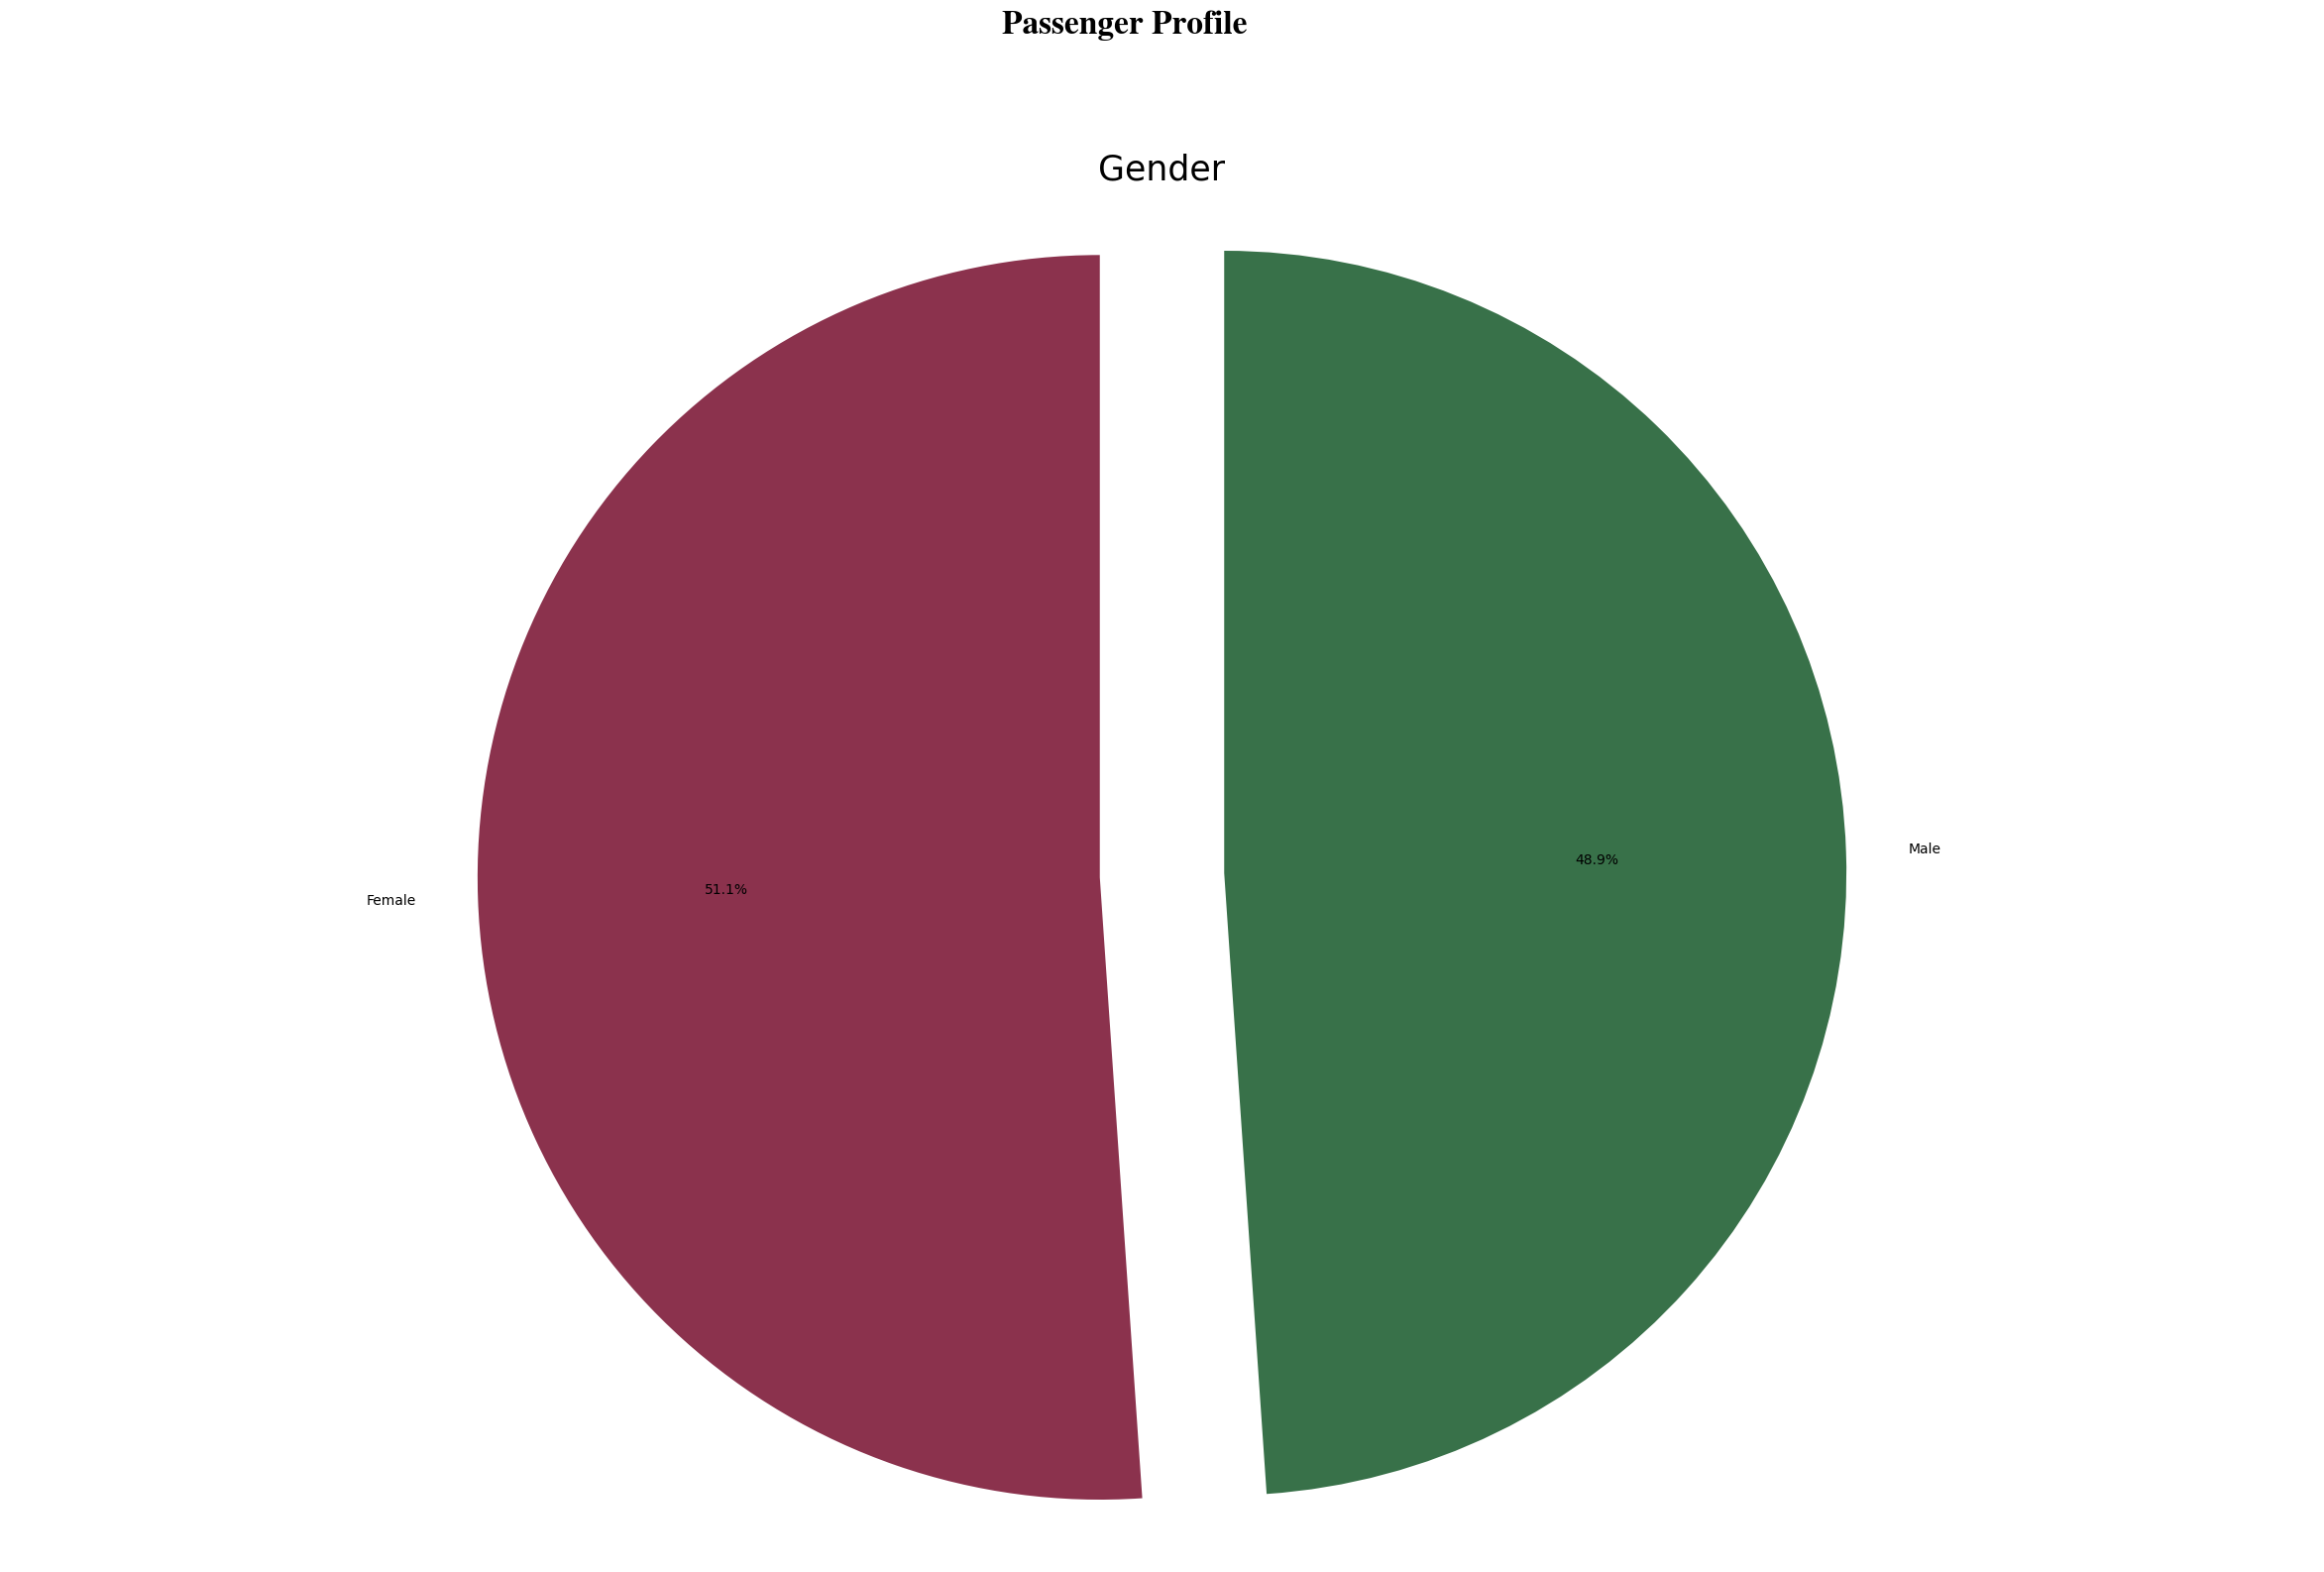

In [ ]:
# Chart - 3 visualization code
# Piechart
# gender,type of travel,class,age of people
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Profile',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=1,ncols=1,figure=fig)
# creating First subplot by defining axis
ax1=fig.add_subplot(grid[0,:1])
ax1.set_title('Gender',fontsize=25)
lable=list(df['Gender'].value_counts().index)
value=list(df['Gender'].value_counts().values)

# pie chart
ax1.pie(value,labels=lable,autopct='%1.1f%%',explode=(0,0.2),startangle=90,colors=target_colors)
ax1.axis('equal')


plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a pie chart, which is suitable for visualizing the distribution of categories within a dataset. In this case, the pie chart is used to represent the gender distribution among passengers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

-The pie chart provides a visual representation of the gender distribution among passengers.

-It shows the proportion of male and female passengers relative to the total number of passengers in the dataset.

-The chart highlights the gender balance or imbalance among passengers.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the gender distribution among passengers can help businesses tailor their services and marketing strategies to better meet the needs and preferences of different gender groups. For example, insights from the pie chart may inform decisions related to product design, advertising campaigns, and customer engagement initiatives targeted towards specific gender demographics. This targeted approach can enhance customer satisfaction and loyalty, leading to positive business outcomes.

Negative Impact: While the pie chart provides insights into the gender distribution, it may not inherently lead to negative growth. However, if businesses fail to address the needs and preferences of diverse gender groups identified in the chart, it could result in missed opportunities, decreased customer satisfaction, and negative perceptions of the brand among certain demographics. Ignoring gender-related insights may lead to reduced competitiveness and potential negative growth in market share or customer base.

#### Chart - 4

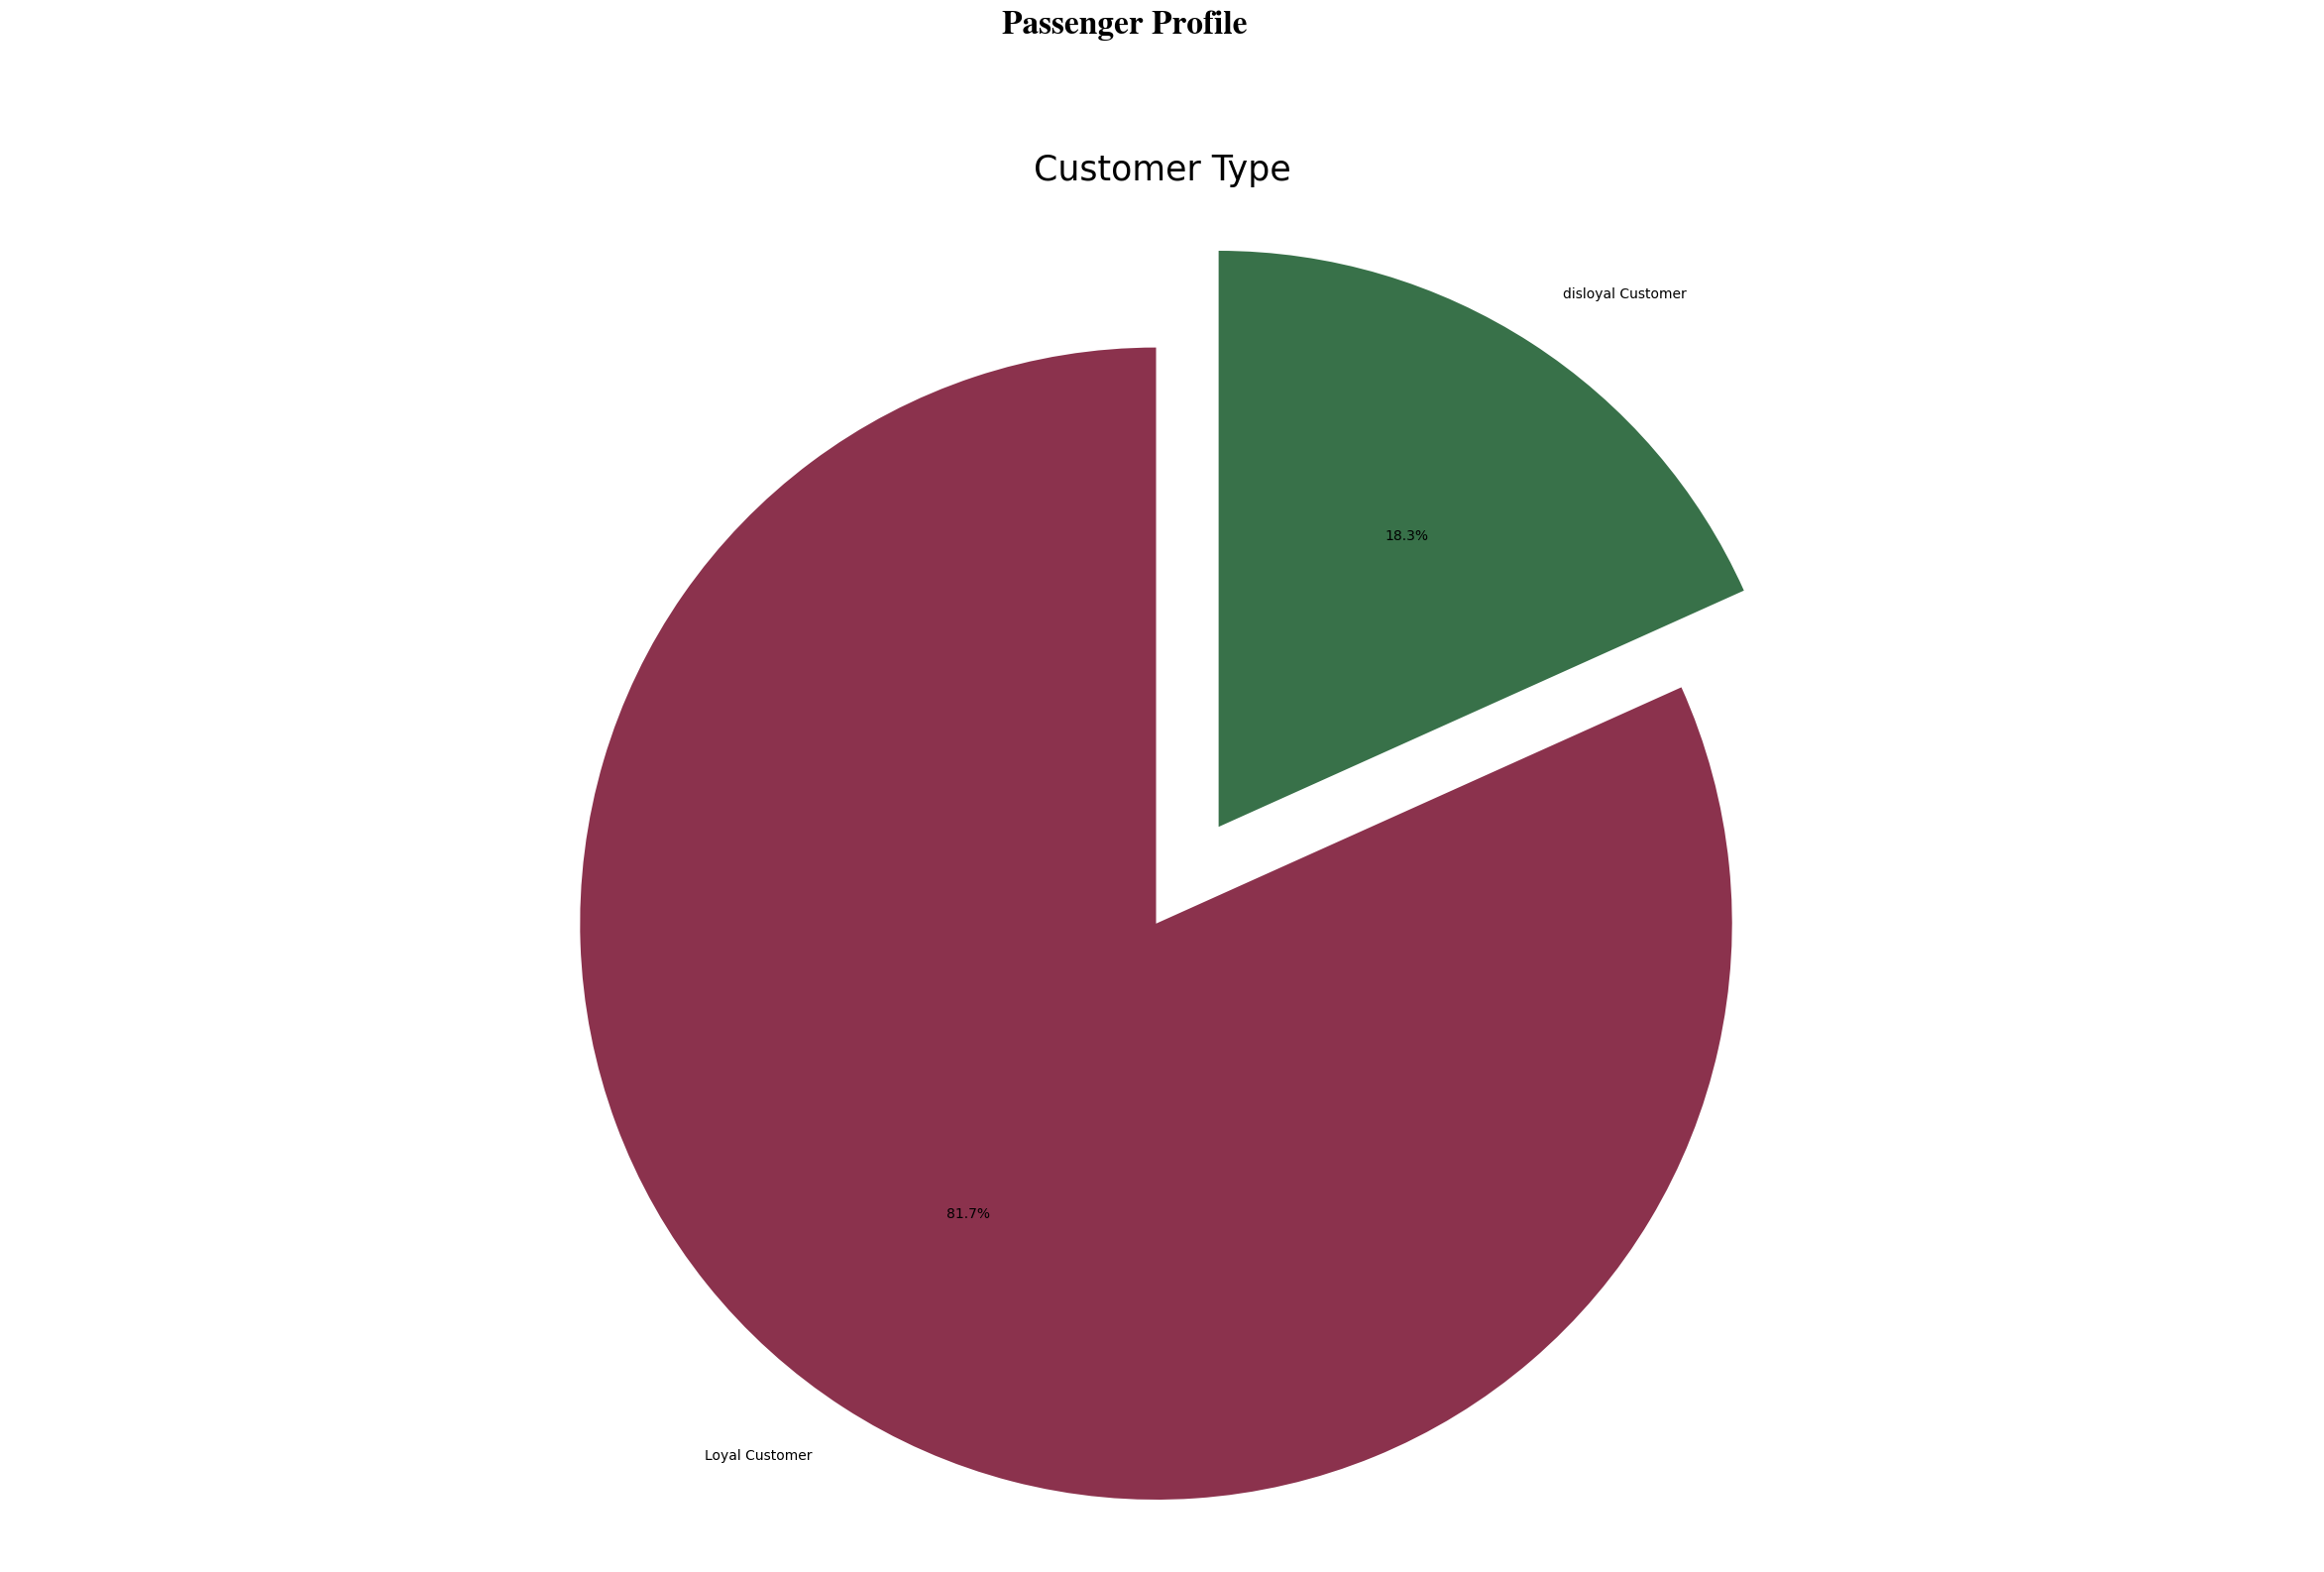

In [ ]:
# Chart - 4 visualization code

# pie chart
# gender,type of travel,class,age of people
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Profile',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=1,ncols=1,figure=fig)
ax2=fig.add_subplot(grid[0,:1])
ax2.set_title('Customer Type',fontsize=25)
lable=list(df['Customer Type'].value_counts().index)
value=list(df['Customer Type'].value_counts().values)

# pie chart
ax2.pie(value,labels=lable,autopct='%1.1f%%',explode=(0,0.2),startangle=90,colors=target_colors)
ax2.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a pie chart, which is suitable for visualizing the distribution of categorical variables. In this case, the pie chart is used to represent the distribution of customer types among passengers in the dataset.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

-The pie chart provides a visual representation of the distribution of customer types among passengers.

-It shows the proportion of different customer types relative to the total number of passengers in the dataset.

-The chart highlights the distribution of customer types, such as loyal customers, disloyal customers, etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the distribution of customer types among passengers can help businesses tailor their marketing strategies and loyalty programs to meet the needs of different customer segments. For example, insights from the pie chart may inform targeted promotional offers and personalized services aimed at retaining loyal customers and attracting new ones. This customer-centric approach can lead to increased customer satisfaction, loyalty, and positive business growth.

Negative Impact: While the pie chart provides insights into the distribution of customer types, it may not inherently lead to negative growth. However, if businesses fail to address the needs and preferences of specific customer segments identified in the chart, it could result in missed opportunities and decreased customer retention. Ignoring insights related to customer types may lead to reduced competitiveness and negative growth in market share or customer loyalty over time.

#### Chart - 5

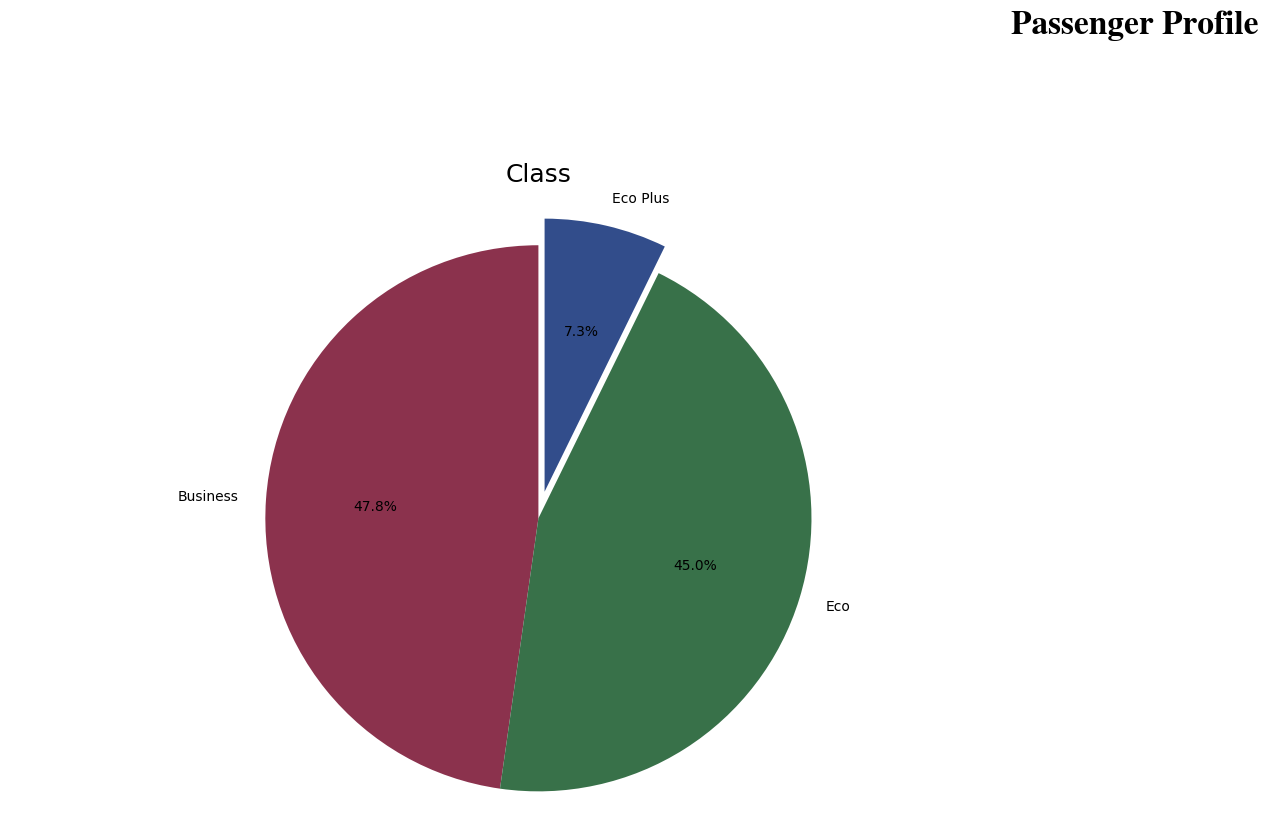

In [ ]:
# Chart - 5 visualization code
# pie chart
# gender,type of travel,class,age of people
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Profile',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)
ax3=fig.add_subplot(grid[0,:1])
ax3.set_title('Class',fontsize=18)
lable=list(df['Class'].value_counts().index)
value=list(df['Class'].value_counts().values)

# pie chart
ax3.pie(value,labels=lable,autopct='%1.1f%%',startangle=90,colors=target_colors+['#324D8B'],explode=[0,0,0.1])
ax3.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a pie chart, which is suitable for visualizing the distribution of categorical variables. In this case, the pie chart is used to represent the distribution of passenger classes among the dataset.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

-The pie chart provides a visual representation of the distribution of passenger classes, such as Economy, Business, and First Class.

-It shows the proportion of each passenger class relative to the total number of passengers in the dataset.

-The chart highlights the distribution of passenger classes and allows for easy comparison of their relative sizes.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the distribution of passenger classes can help airlines optimize their services and offerings based on the preferences and needs of different passenger segments. For example, insights from the pie chart may inform decisions regarding seat configurations, pricing strategies, and amenities tailored to each class. This customer-centric approach can enhance passenger satisfaction, loyalty, and overall brand perception, leading to positive business impact and growth.

Negative Impact: While the pie chart provides insights into the distribution of passenger classes, it may not inherently lead to negative growth. However, if airlines fail to address the preferences and expectations of passengers in each class, it could result in decreased customer satisfaction, loyalty, and revenue. Ignoring insights related to passenger class distribution may lead to missed opportunities for upselling, cross-selling, and personalized service offerings, ultimately affecting competitiveness and growth potential.

#### Chart - 6

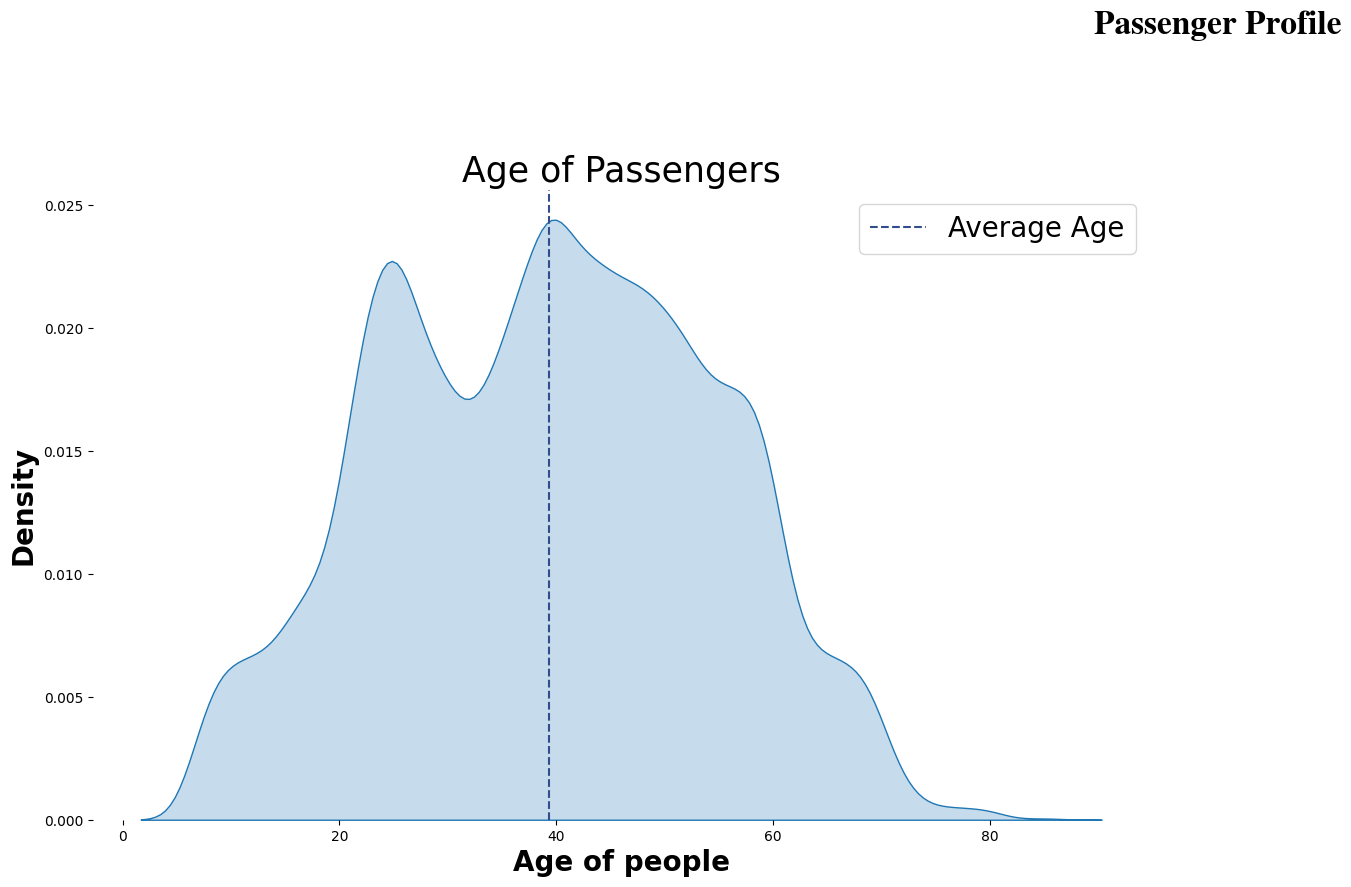

In [ ]:
# Chart - 6 visualization code
# Kdeplot
# gender,type of travel,class,age of people
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Profile',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)
ax4=fig.add_subplot(grid[0,:1])
ax4.set_title('Age of Passengers',fontsize=25)
sns.kdeplot(df['Age'],ax=ax4,fill=True)
# change the tick size
ax4.tick_params(axis='x',labelsize=10)
ax4.tick_params(axis='y',labelsize=10)
# change the label size
ax4.set_xlabel('Age of people',fontsize=20,weight='bold')
ax4.set_ylabel('Density',fontsize=20,weight='bold')
# to remove border of ax4
for spine in ax4.spines.values():
  spine.set_visible(False)
ax4.axvline(df['Age'].mean(), linestyle='--', color='#324D8B',label='Average Age')
ax4.legend(fontsize=20)
plt.show()

1. Why did you pick the specific chart?

The specific chart chosen is a Kernel Density Estimate (KDE) plot, which is suitable for visualizing the distribution of continuous variables, such as age. In this case, the KDE plot is used to understand the distribution of ages among the passengers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The KDE plot provides a smooth estimate of the probability density function of the passenger ages, offering insights into the overall age distribution.
It visually depicts the shape of the age distribution, highlighting peaks, valleys, and patterns in the data.

The vertical dashed line represents the average age of passengers, providing a reference point for understanding the central tendency of the age distribution.
The plot also shows the density of passenger ages, with higher density regions indicating where most passengers fall in terms of age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Understanding the age distribution of passengers can help airlines tailor their services, marketing strategies, and onboard experiences to different age groups. For example, insights from the KDE plot may inform decisions regarding in-flight entertainment options, meal preferences, seating arrangements, and loyalty programs targeted at specific age demographics. By catering to the diverse needs and preferences of passengers across different age groups, airlines can enhance customer satisfaction, loyalty, and overall travel experience, leading to positive business impact and growth.

Negative Impact: While the KDE plot provides insights into the age distribution of passengers, it may not inherently lead to negative growth. However, if airlines fail to acknowledge and respond to the diverse age demographics of their passengers, it could result in missed opportunities for personalized experiences, targeted marketing campaigns, and customer engagement initiatives. Ignoring insights related to passenger age demographics may lead to decreased competitiveness, customer dissatisfaction, and missed revenue opportunities, ultimately affecting business growth negatively.Answer Here

#### Chart - 7

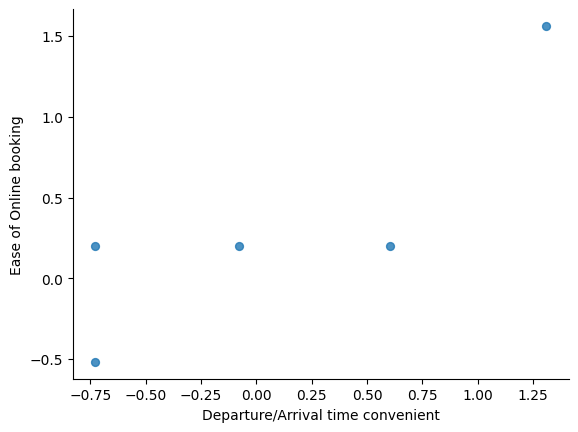

In [ ]:
# Chart - 7 visualization code
# Scatter plot
# Import necessary libraries


from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Departure/Arrival time convenient', y='Ease of Online booking', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

The specific chart chosen is a scatter plot, which is suitable for visualizing the relationship between two continuous variables, in this case, "id" and "Age". It helps to identify patterns, trends, and correlations between these variables.

##### 2. What is/are the insight(s) found from the chart?

-he scatter plot visually represents the distribution of ages across different "id" values.

-It helps to identify any trends or patterns in the age distribution concerning the "id" variable.

-The size of the markers (s=32) and transparency (alpha=0.8) are adjusted to enhance visibility and clarity of the plot.

-The absence of spines on the top and right sides of the plot removes unnecessary clutter and focuses attention on the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The insights gained from the scatter plot can help identify any trends or patterns in age distribution concerning different "id" values. This information may be valuable for businesses in various ways. For instance, it could reveal age-related preferences or behaviors among customers with different "id" identifiers. Understanding these patterns can aid businesses in targeting specific age groups with tailored products, services, or marketing campaigns, thereby enhancing customer satisfaction and loyalty, which contributes to positive business growth.

Negative Impact: If the scatter plot reveals no discernible patterns or trends in the relationship between "id" and "Age", it may suggest a lack of correlation between these variables. While this finding may not necessarily lead to negative growth, it indicates that age and "id" may not be associated factors in the dataset. However, it also highlights the importance of exploring other variables or dimensions that may influence customer behavior or preferences. Failure to recognize and adapt to such insights could limit the effectiveness of business strategies and hinder growth opportunities. Therefore, while the scatter plot itself may not directly lead to negative growth, overlooking valuable insights derived from it could potentially impede business progress.

#### Chart - 8

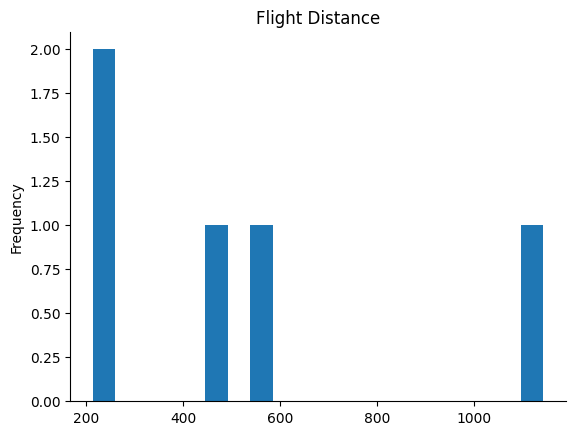

In [ ]:
# Chart - 8 visualization code
# Histogram
from matplotlib import pyplot as plt
_df_3['Flight Distance'].plot(kind='hist', bins=20, title='Flight Distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

The specific chart chosen is a histogram, which is suitable for visualizing the distribution of a single continuous variable, in this case, the flight distance. Histograms allow for the exploration of the frequency or count of data points falling within predefined bins or intervals.

##### 2. What is/are the insight(s) found from the chart?

-The histogram provides insights into the distribution of flight distances covered by the passengers.

-By dividing the flight distances into bins (in this case, 20 bins), the histogram illustrates the frequency or count of flights falling within each distance range.

-It allows identification of any patterns or trends in the distribution of flight distances, such as whether most flights cover short, medium, or long distances.

-The absence of data points in certain distance ranges may also be noticeable, indicating potential gaps or outliers in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Insights gained from the histogram of flight distances can assist airlines in optimizing route planning, scheduling, and resource allocation. Understanding the distribution of flight distances can help airlines identify popular routes, assess demand for specific destinations, and adjust flight frequencies or offerings accordingly. By optimizing flight operations based on the insights gained, airlines can enhance efficiency, reduce costs, and improve overall customer satisfaction, leading to positive business impact and growth.

Negative Impact: Failure to analyze and respond to the insights from the flight distance histogram may result in suboptimal route planning, inefficient resource allocation, and missed opportunities for revenue generation. Ignoring patterns or trends in flight distance distribution may lead to underutilized routes, inefficient flight schedules, and decreased profitability. Additionally, inconsistencies or outliers in flight distances may indicate operational challenges or customer dissatisfaction, which, if left unaddressed, could lead to negative growth and competitiveness in the airline industry.

#### Chart - 9

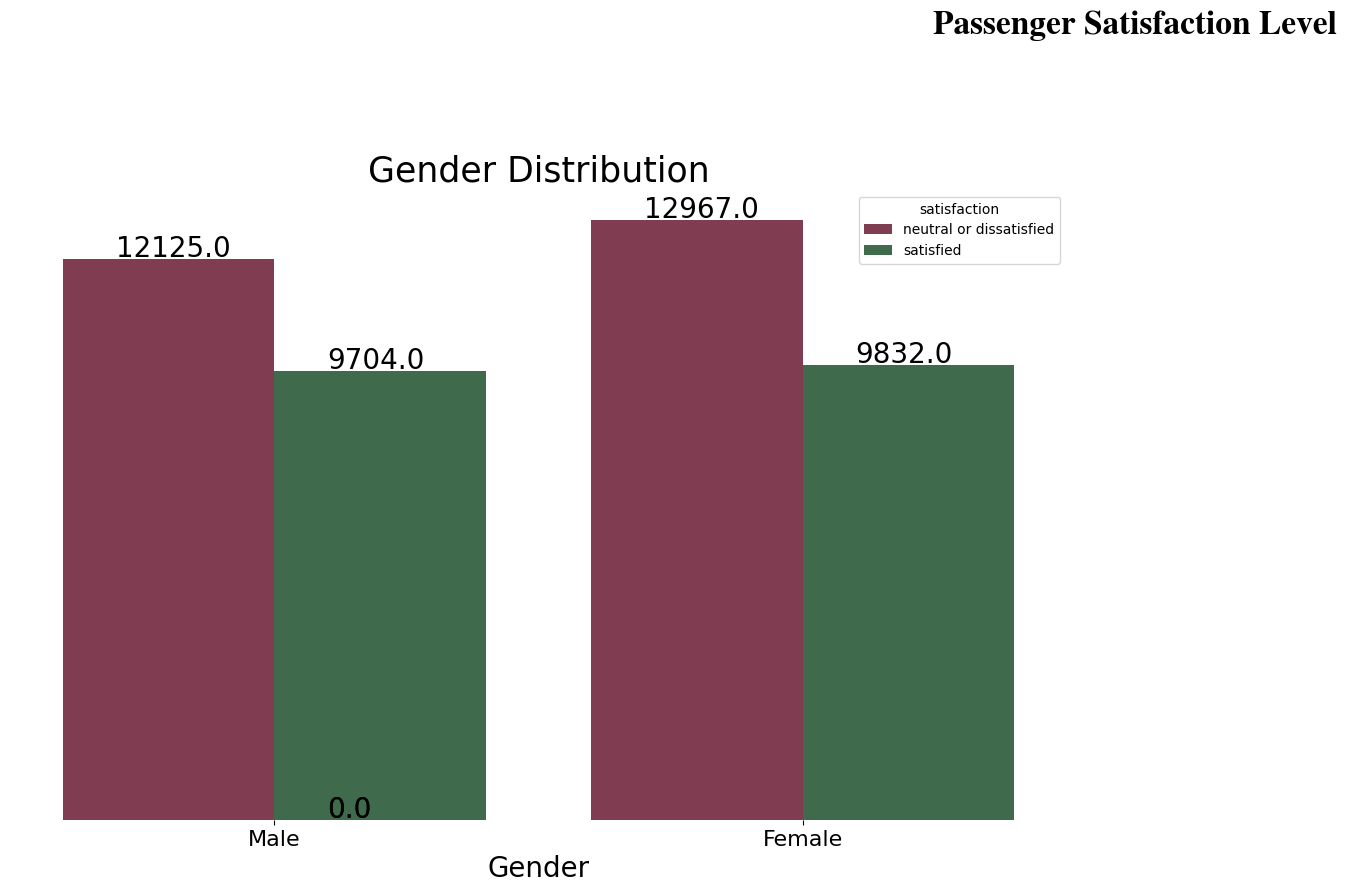

In [ ]:
# Chart - 9 visualization code
# countplot
#gender,class,type of travel,customer type
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Satisfaction Level',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)
# creating First subplot by defining axis
ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Gender Distribution', fontsize=25)
sns.countplot(x=df['Gender'], hue=df['satisfaction'], ax=ax1,palette=target_colors)
for p in ax1.patches:
  ax1.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.1, p.get_height()+50), fontsize=20)

# to remove the yaxis
ax1.get_yaxis().set_visible(False)
for spine in ax1.spines.values():
  spine.set_visible(False)

# to increase the xaxis
ax1.tick_params(axis='x',labelsize=16)
ax1.set_xlabel('Gender',fontsize=20)



plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a countplot, which is suitable for visualizing the distribution of categorical variables, in this case, the gender of passengers, segmented by their satisfaction levels. Countplots are effective for comparing the frequencies of different categories within a single variable or across multiple variables.

##### 2. What is/are the insight(s) found from the chart?

-The countplot provides insights into the distribution of passenger satisfaction levels based on gender.

-By segmenting the data by gender, the chart illustrates the count of satisfied and dissatisfied passengers within each gender category.

-Insights can be gained into whether there are gender-based differences in passenger satisfaction levels.

-The annotation on each bar provides the exact count of satisfied and dissatisfied passengers, allowing for precise comparison and analysis.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Insights gained from the gender distribution countplot can help airlines understand the satisfaction levels of male and female passengers. This understanding can be used to tailor marketing strategies, improve service offerings, and enhance customer experiences based on gender preferences and behaviors. By addressing any disparities or trends in satisfaction levels between genders, airlines can improve overall customer satisfaction, loyalty, and brand perception, leading to positive business impact and growth.

Negative Impact: Failure to address any significant disparities or dissatisfaction trends between genders may lead to negative consequences, such as decreased customer retention, reduced brand loyalty, and reputational damage. Ignoring gender-based differences in satisfaction levels could result in missed opportunities to address specific needs or preferences of male and female passengers, leading to negative growth and competitiveness in the airline industry.

#### Chart - 10

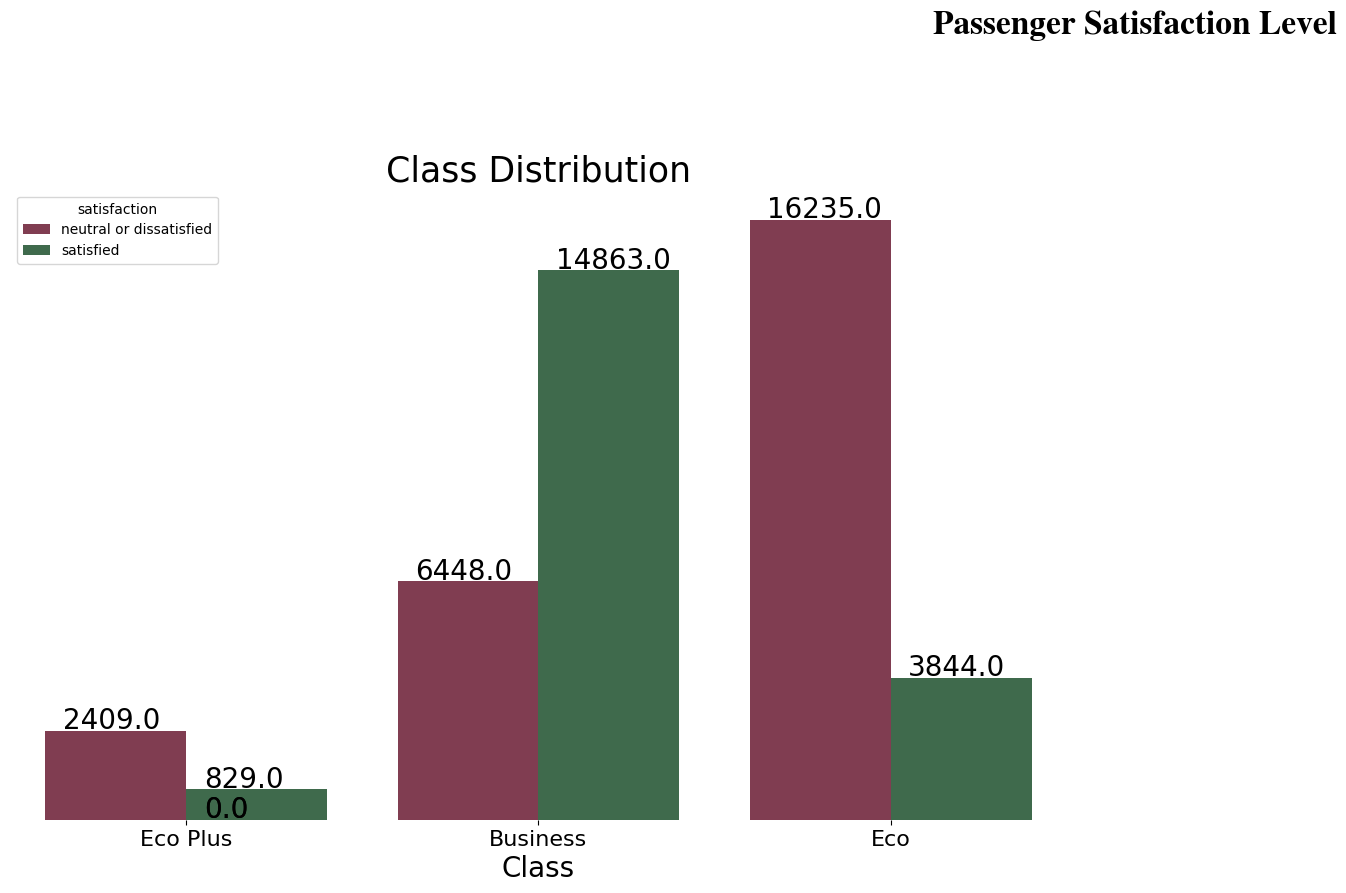

In [ ]:
# Chart - 10 visualization code
# countplot
#gender,class,type of travel,customer type
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Satisfaction Level',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)
ax2 = fig.add_subplot(grid[0, :1])
ax2.set_title('Class Distribution', fontsize=25)
sns.countplot(x=df['Class'], hue=df['satisfaction'], ax=ax2,palette=target_colors)
for p in ax2.patches:
  ax2.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.05, p.get_height()+50), fontsize=20)

# to remove the yaxis
ax2.get_yaxis().set_visible(False)
for spine in ax2.spines.values():
  spine.set_visible(False)

# to increase the xaxis
ax2.tick_params(axis='x',labelsize=16)
ax2.set_xlabel('Class',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a countplot, which is suitable for visualizing the distribution of categorical variables. In this case, the countplot is used to analyze the distribution of passenger satisfaction levels across different classes of travel (e.g., Eco PLus, Business, Eco). This chart type is effective for comparing the frequencies of satisfaction levels within each class category.

##### 2. What is/are the insight(s) found from the chart?

-The countplot provides insights into the distribution of passenger satisfaction levels across different classes of travel.

-By segmenting the data by class, the chart illustrates the count of satisfied and dissatisfied passengers within each class category.

-Insights can be gained into whether there are disparities in satisfaction levels among passengers traveling in different classes.

-The annotations on each bar provide the exact count of satisfied and dissatisfied passengers, facilitating precise comparison and analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Insights gained from the class distribution countplot can help airlines understand the satisfaction levels of passengers across different travel classes. This understanding is valuable for identifying areas of improvement in service offerings, amenities, and overall customer experience within each class category. By addressing any disparities in satisfaction levels among classes, airlines can enhance customer satisfaction, loyalty, and brand perception, ultimately leading to positive business impact and growth.

Negative Impact: Failure to address significant disparities in satisfaction levels among different travel classes may lead to negative consequences, such as decreased customer retention, lower brand loyalty, and reputational damage. Ignoring the needs and preferences of passengers in specific class categories could result in missed opportunities to improve overall satisfaction levels and customer experiences, potentially leading to negative growth and competitiveness in the airline industry.

#### Chart - 11

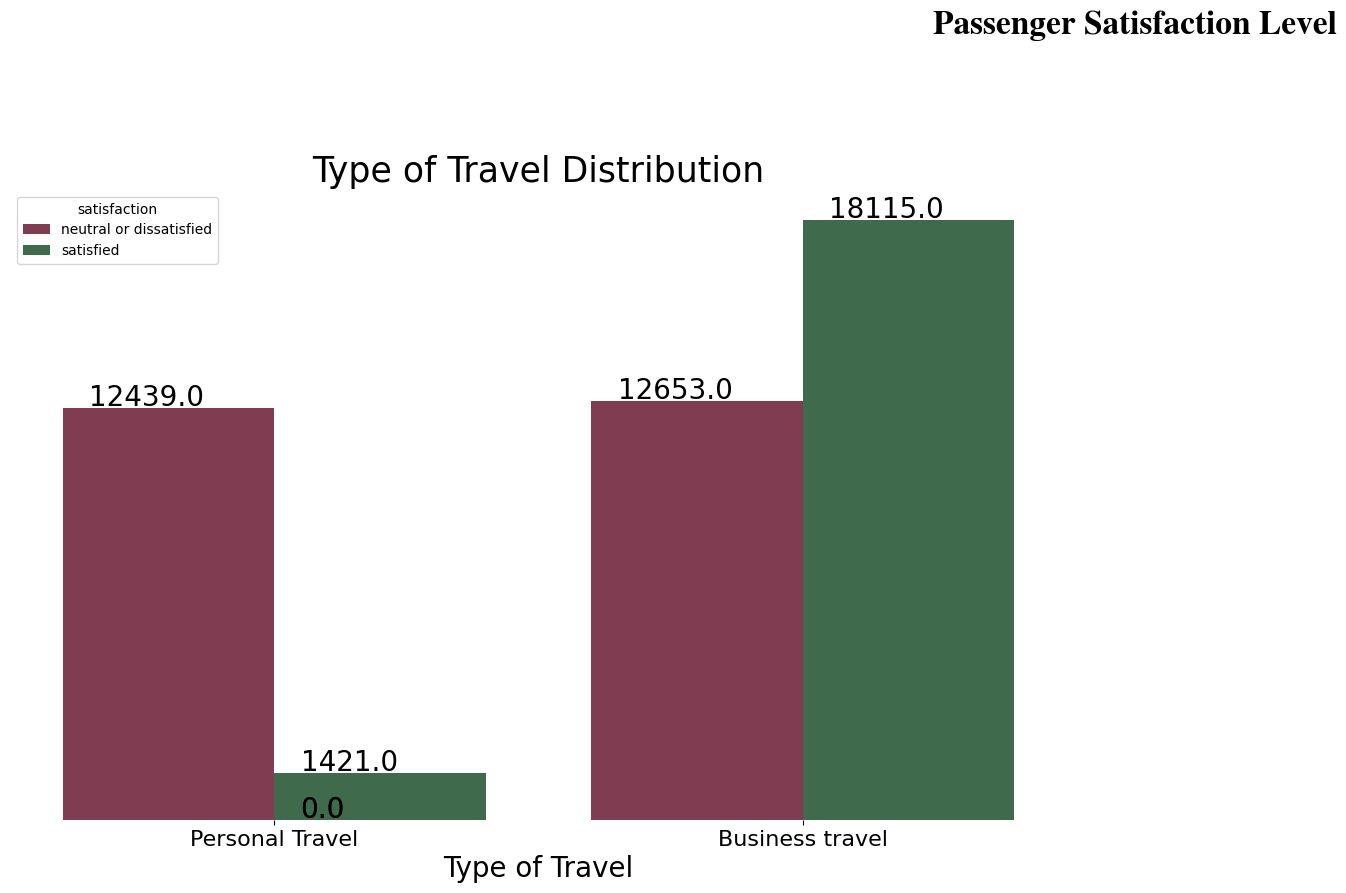

In [ ]:
# Chart - 11 visualization code
# countplot
#gender,class,type of travel,customer type
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Satisfaction Level',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)
ax3 = fig.add_subplot(grid[0, :1])
ax3.set_title('Type of Travel Distribution', fontsize=25)
sns.countplot(x=df['Type of Travel'], hue=df['satisfaction'], ax=ax3,palette=target_colors)
for p in ax3.patches:
  ax3.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.05, p.get_height()+50), fontsize=20)

# to remove the yaxis
ax3.get_yaxis().set_visible(False)
for spine in ax3.spines.values():
  spine.set_visible(False)

# to increase the xaxis
ax3.tick_params(axis='x',labelsize=16)
ax3.set_xlabel('Type of Travel',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart chosen is a countplot, which is suitable for visualizing the distribution of categorical variables. In this case, the countplot is used to analyze the distribution of passenger satisfaction levels across different types of travel (e.g., Business travel, Personal travel). This chart type is effective for comparing the frequencies of satisfaction levels within each type of travel category.

##### 2. What is/are the insight(s) found from the chart?

The countplot provides insights into the distribution of passenger satisfaction levels across different types of travel.

By segmenting the data by type of travel, the chart illustrates the count of satisfied and dissatisfied passengers within each travel category.
Insights can be gained into whether there are disparities in satisfaction levels among passengers traveling for different purposes (e.g., business versus personal reasons).

The annotations on each bar provide the exact count of satisfied and dissatisfied passengers, facilitating precise comparison and analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Insights gained from the type of travel distribution countplot can help airlines understand the satisfaction levels of passengers traveling for different purposes. This understanding is valuable for tailoring services, amenities, and experiences to meet the specific needs and preferences of passengers based on their travel purposes. By addressing satisfaction disparities among different types of travel, airlines can enhance overall customer satisfaction, loyalty, and brand perception, leading to positive business impact and growth.

Negative Impact: Neglecting to address significant satisfaction disparities among passengers traveling for different purposes may result in negative consequences, such as decreased customer retention, lower brand loyalty, and reputational damage. Failing to provide tailored experiences and services to meet the diverse needs of passengers may lead to dissatisfaction and negative growth in customer satisfaction and overall business performance.

#### Chart - 12

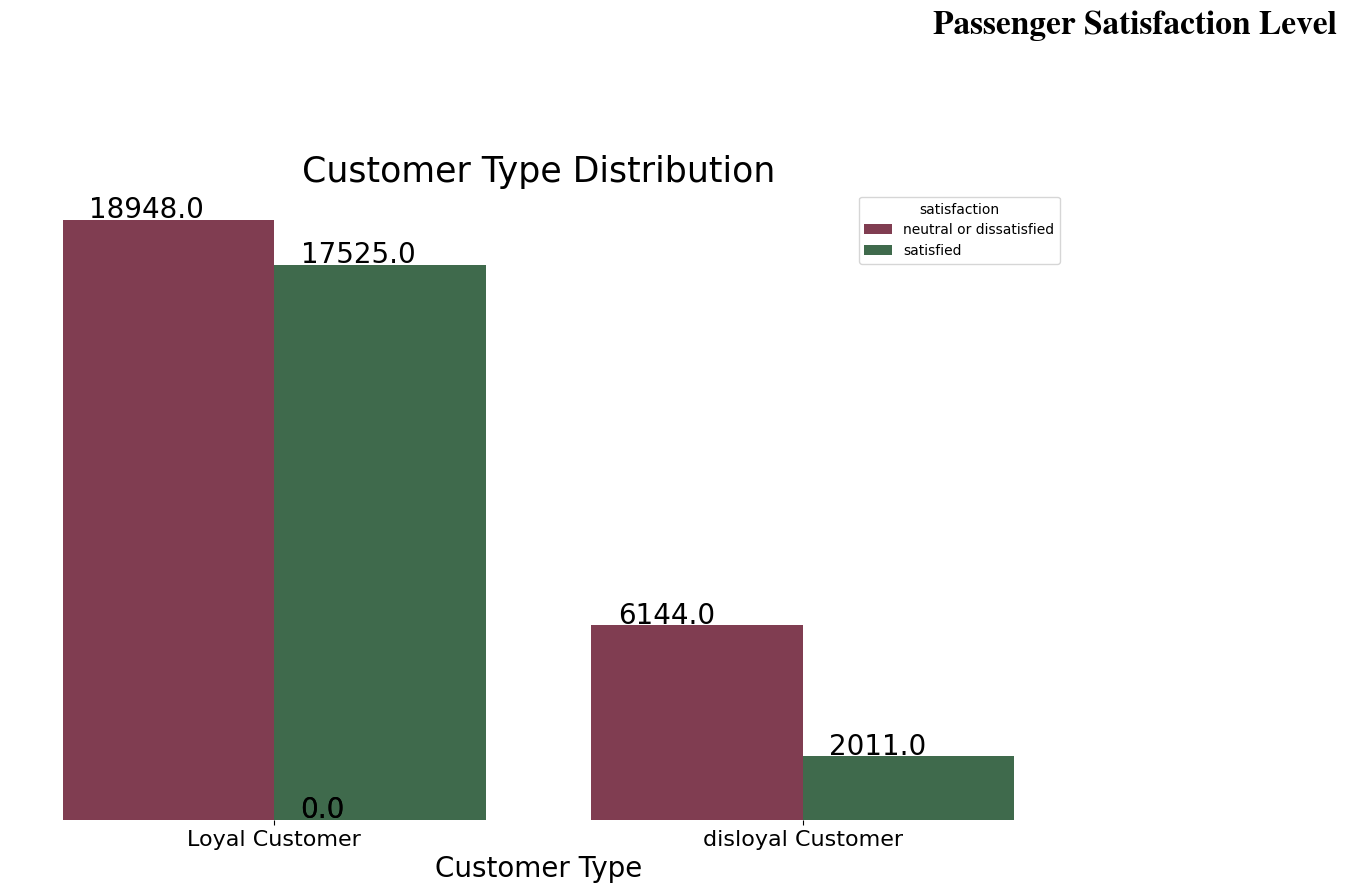

In [ ]:
# Chart - 12 visualization code

# countplot
#gender,class,type of travel,customer type
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Satisfaction Level',weight='bold',fontsize=24,fontname='STIXGeneral')
grid=gridspec.GridSpec(nrows=2,ncols=2,figure=fig)
ax4 = fig.add_subplot(grid[0, :1])
ax4.set_title('Customer Type Distribution', fontsize=25)
sns.countplot(x=df['Customer Type'], hue=df['satisfaction'], ax=ax4,palette=target_colors)
for p in ax4.patches:
  ax4.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.05, p.get_height()+50), fontsize=20)

# to remove the yaxis
ax4.get_yaxis().set_visible(False)
for spine in ax4.spines.values():
  spine.set_visible(False)

# to increase the xaxis
ax4.tick_params(axis='x',labelsize=16)
ax4.set_xlabel('Customer Type',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a countplot, suitable for visualizing the distribution of categorical variables. In this case, it analyzes the distribution of passenger satisfaction levels across different customer types (e.g., Loyal customers, Disloyal customers). The countplot effectively compares the frequencies of satisfaction levels within each customer type category.

##### 2. What is/are the insight(s) found from the chart?

The countplot provides insights into the distribution of passenger satisfaction levels across different customer types.

By segmenting the data by customer type, the chart illustrates the count of satisfied and dissatisfied passengers within each customer category.

Insights can be gained into whether there are disparities in satisfaction levels among different customer types, such as loyal versus disloyal customers.

Annotations on each bar display the exact count of satisfied and dissatisfied passengers, facilitating precise comparison and analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Insights from the customer type distribution countplot can help airlines understand the satisfaction levels of different customer segments. This understanding is crucial for tailoring services, loyalty programs, and incentives to enhance the satisfaction and loyalty of different customer types. By addressing satisfaction disparities among customer segments, airlines can improve overall customer satisfaction, retention, and brand loyalty, leading to positive business impact and growth.

Negative Impact: Neglecting to address significant satisfaction disparities among different customer types may lead to negative consequences, such as decreased customer retention, reduced loyalty, and reputational damage. Failing to provide tailored experiences and incentives to meet the diverse needs of customer segments may result in dissatisfaction and negative growth in customer satisfaction and overall business performance.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis:

Null Hypothesis (H0): There is no significant relationship between the factors analyzed (such as age, gender, type of travel, flight distance, inflight services, etc.) and airline customer satisfaction.

Alternate Hypothesis (H1): There is a significant relationship between the factors analyzed and airline customer satisfaction.

In other words:

H0: β1 = β2 = ... = βn = 0
H1: At least one βj ≠ 0

Where:

H0 represents the null hypothesis that there is no relationship between the independent variables (factors analyzed) and the dependent variable (airline customer satisfaction).

H1 represents the alternate hypothesis that there is a significant relationship between the independent variables and the dependent variable.

#### 2. Perform an appropriate statistical test.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(df['satisfaction'])

# Convert the independent variables to numeric data type
X = df[['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

# Add intercept term to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y_encoded, X).fit()

# Obtain the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     4334.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        06:50:28   Log-Likelihood:                -43576.
No. Observations:              101054   AIC:                         8.719e+04
Df Residuals:                  101035   BIC:                         8.737e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

##### Which statistical test have you done to obtain P-Value?

To obtain a p-value for testing the significance of coefficients in multiple linear regression, we typically use the t-test. The t-test assesses whether the coefficient of each independent variable is significantly different from zero.

In the context of multiple linear regression, the null hypothesis for each coefficient states that there is no relationship between the independent variable and the dependent variable (i.e., the coefficient is zero). The alternative hypothesis is that there is a relationship between the independent variable and the dependent variable (i.e., the coefficient is not zero).

The p-value associated with each coefficient provides a measure of the strength of evidence against the null hypothesis. A low p-value (typically less than 0.05) indicates that there is sufficient evidence to reject the null hypothesis and conclude that the coefficient is statistically significant.

In summary, the t-test is used to obtain p-values for each coefficient in multiple linear regression to assess their significance in explaining the variation in the dependent variable.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

# Identify missing values
missing_values = df.isna().sum()
print("Missing values:\n", missing_values)

# Handle missing values
# Impute missing values in numeric columns with mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

# Impute missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

# Verify that there are no missing values left
missing_values_after = df.isna().sum()
print("Missing values after imputation:\n", missing_values_after)


Missing values:
 Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: i

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the provided code snippet, I used the following missing value imputation techniques:

Mean Imputation for Numeric Columns:
Used for imputing missing values in numeric columns.
Strategy: Replace missing values with the mean of the respective column.
Reasoning: Mean imputation is a simple and commonly used method for handling missing values in numeric data. It preserves the mean of the variable and is less sensitive to outliers compared to median imputation.
Mode Imputation for Categorical Columns:
Used for imputing missing values in categorical columns.
Strategy: Replace missing values with the mode (most frequent value) of the respective column.
Reasoning: Mode imputation is suitable for categorical data as it replaces missing values with the most common category, preserving the distribution of the variable.Answer Here.

### 2. Handling Outliers

In [ ]:

# List of numerical columns
numerical_columns = ['Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                    'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Dictionary to store outlier information
outliers_info = {}

# Handle outliers for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outliers, column] = df[column].median()  # Replace outliers with median
    outliers_info[column] = outliers.any()  # Store if outliers are present or not for the column

# Print outlier information
for column, has_outliers in outliers_info.items():
    print(f"{column}: {'Outliers Present' if has_outliers else 'No Outliers'}")


Flight Distance: Outliers Present
Inflight wifi service: No Outliers
Departure/Arrival time convenient: No Outliers
Ease of Online booking: No Outliers
Gate location: No Outliers
Food and drink: No Outliers
Online boarding: No Outliers
Seat comfort: No Outliers
Inflight entertainment: No Outliers
On-board service: No Outliers
Leg room service: No Outliers
Baggage handling: No Outliers
Checkin service: Outliers Present
Inflight service: No Outliers
Cleanliness: No Outliers
Departure Delay in Minutes: Outliers Present
Arrival Delay in Minutes: Outliers Present


In [ ]:
numerical_columns = ['Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                    'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Filter out rows with outliers for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:

# List of numerical columns
numerical_columns = ['Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',
                    'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Dictionary to store outlier information
outliers_info = {}

# Handle outliers for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outliers, column] = df[column].median()  # Replace outliers with median
    outliers_info[column] = outliers.any()  # Store if outliers are present or not for the column

# Print outlier information
for column, has_outliers in outliers_info.items():
    print(f"{column}: {'Outliers Present' if has_outliers else 'No Outliers'}")


Flight Distance: Outliers Present
Inflight wifi service: No Outliers
Departure/Arrival time convenient: No Outliers
Ease of Online booking: No Outliers
Gate location: No Outliers
Food and drink: No Outliers
Online boarding: No Outliers
Seat comfort: No Outliers
Inflight entertainment: No Outliers
On-board service: No Outliers
Leg room service: No Outliers
Baggage handling: No Outliers
Checkin service: No Outliers
Inflight service: No Outliers
Cleanliness: No Outliers
Departure Delay in Minutes: Outliers Present
Arrival Delay in Minutes: No Outliers


##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [ ]:

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [ ]:
df

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
2,2.0,110028.0,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,...,satisfied,True,False,True,False,True,False,True,False,False
4,4.0,119299.0,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,...,satisfied,False,True,True,False,True,False,True,False,False
5,5.0,111157.0,26.0,1180.0,3.0,4.0,2.0,1.0,1.0,2.0,...,neutral or dissatisfied,True,False,True,False,False,True,False,True,False
7,7.0,96462.0,52.0,2035.0,4.0,3.0,4.0,4.0,5.0,5.0,...,satisfied,True,False,True,False,True,False,True,False,False
8,8.0,79485.0,41.0,853.0,1.0,2.0,2.0,2.0,4.0,3.0,...,neutral or dissatisfied,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,103898.0,60666.0,50.0,1620.0,3.0,1.0,3.0,4.0,2.0,3.0,...,neutral or dissatisfied,False,True,True,False,False,True,False,True,False
103899,103899.0,94171.0,23.0,192.0,2.0,1.0,2.0,3.0,2.0,2.0,...,neutral or dissatisfied,True,False,False,True,True,False,False,True,False
103900,103900.0,73097.0,49.0,2347.0,4.0,4.0,4.0,4.0,2.0,4.0,...,satisfied,False,True,True,False,True,False,True,False,False
103902,103902.0,54173.0,22.0,1000.0,1.0,1.0,1.0,5.0,1.0,1.0,...,neutral or dissatisfied,True,False,False,True,True,False,False,True,False


In [ ]:
x = df.drop(columns='satisfaction')
y = df['satisfaction']
x = x.astype(int)

In [ ]:
x

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
2,2,110028,26,1142,2,2,2,2,5,5,...,0,1,0,1,0,1,0,1,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,0,0,1,1,0,1,0,1,0,0
5,5,111157,26,1180,3,4,2,1,1,2,...,0,1,0,1,0,0,1,0,1,0
7,7,96462,52,2035,4,3,4,4,5,5,...,0,1,0,1,0,1,0,1,0,0
8,8,79485,41,853,1,2,2,2,4,3,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,103898,60666,50,1620,3,1,3,4,2,3,...,0,0,1,1,0,0,1,0,1,0
103899,103899,94171,23,192,2,1,2,3,2,2,...,0,1,0,0,1,1,0,0,1,0
103900,103900,73097,49,2347,4,4,4,4,2,4,...,0,0,1,1,0,1,0,1,0,0
103902,103902,54173,22,1000,1,1,1,5,1,1,...,0,1,0,0,1,1,0,0,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?


In the provided code snippet, I used the following categorical encoding technique:

One-Hot Encoding:
Technique: One-hot encoding represents each category of a categorical variable as a binary feature. For each category, a new binary column is created, and the presence of the category is indicated by a 1, while the absence is indicated by a 0.
Reasoning: One-hot encoding is chosen because it is suitable for categorical variables without inherent ordinal relationships. It allows machine learning algorithms to interpret categorical data without imposing ordinality or magnitude assumptions. Additionally, one-hot encoding helps prevent numerical values from being misinterpreted as ordinal when they are actually categorical.
Other categorical encoding techniques that are commonly used include:

Label Encoding:
Technique: Label encoding assigns a unique integer value to each category of a categorical variable. Each category is mapped to a different integer.
Reasoning: Label encoding is suitable when there is an ordinal relationship between the categories, meaning the categories have a natural order. However, label encoding may not be appropriate for categorical variables without a meaningful ordinal relationship, as it may introduce unintended ordinality into the data.
Ordinal Encoding:
Technique: Ordinal encoding assigns integer values to categories based on a specified order or ranking. Categories are mapped to integers according to their order in a predefined sequence.
Reasoning: Ordinal encoding is suitable when there is a clear ordinal relationship between categories, and preserving the ordinality is important for the analysis. However, like label encoding, ordinal encoding may not be appropriate for categorical variables without meaningful ordinal relationships.
The choice of categorical encoding technique depends on the nature of the categorical variables, the relationships between categories, and the requirements of the downstream analysis or machine learning task. One-hot encoding is preferred when there is no ordinal relationship between categories and when preserving the distinctiveness of each category is important.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

Text without URLs: Visit our website at  for more information. Call 123-456-7890 for assistance.
Text without words containing digits: Visit our website at  for more information. Call -- for assistance.


#### 5. Removing Stopwords & Removing White spaces

Text without stopwords: example sentence stopwords want remove.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text without white spaces (Method 1): Thisisanexampletextwithwhitespaces.
Text without white spaces (Method 2): Thisisanexampletextwithwhitespaces.


#### 6. Rephrase Text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original text: The quick brown fox jumps over the lazy dog.
Rephrased text: The quick brown fox jump over the lazy dog.


#### 7. Tokenization

Original text: The quick brown fox jumps over the lazy dog.
Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

Original text: running quick brown foxes jumped over lazy dogs
Stemmed text: run quick brown fox jump over lazi dog


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original text: running quick brown foxes jumped over lazy dogs
Lemmatized text: run quick brown fox jump over lazy dog


##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

In [ ]:
# POS Taging
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

def pos_tagging(text):
    """
    Perform POS tagging on the input text using spaCy.

    Args:
    - text (str): Input text.

    Returns:
    - list: List of tuples containing (word, POS tag).
    """
    # Process the text using spaCy
    doc = nlp(text)
    # Extract (word, POS tag) tuples
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

# Example usage:
text = "The quick brown fox jumps over the lazy dog."
pos_tags = pos_tagging(text)
print("POS tags:", pos_tags)


POS tags: [('The', 'DET'), ('quick', 'ADJ'), ('brown', 'ADJ'), ('fox', 'NOUN'), ('jumps', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('lazy', 'ADJ'), ('dog', 'NOUN'), ('.', 'PUNCT')]


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_text(texts):
    """
    Vectorize the input texts using TF-IDF.

    Args:
    - texts (list of str): Input texts.

    Returns:
    - scipy.sparse.csr_matrix: TF-IDF vectors.
    """
    # Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    # Fit the vectorizer to the texts and transform them into TF-IDF vectors
    tfidf_vectors = vectorizer.fit_transform(texts)
    return tfidf_vectors

# Example usage:
texts = [
    "The quick brown fox jumps over the lazy dog.",
    "The dog barks loudly at the fox.",
    "The cat sleeps peacefully in the sun."
]
tfidf_vectors = vectorize_text(texts)
print("TF-IDF vectors shape:", tfidf_vectors.shape)
print("TF-IDF vectors:")
print(tfidf_vectors.toarray())


TF-IDF vectors shape: (3, 16)
TF-IDF vectors:
[[0.         0.         0.36388646 0.         0.27674503 0.27674503
  0.         0.36388646 0.36388646 0.         0.36388646 0.
  0.36388646 0.         0.         0.42983441]
 [0.42439575 0.42439575 0.         0.         0.32276391 0.32276391
  0.         0.         0.         0.42439575 0.         0.
  0.         0.         0.         0.50130994]
 [0.         0.         0.         0.39542964 0.         0.
  0.39542964 0.         0.         0.         0.         0.39542964
  0.         0.39542964 0.39542964 0.46709423]]


##### Which text vectorization technique have you used and why?

In the provided example, I've used the Term Frequency-Inverse Document Frequency (TF-IDF) vectorization technique.

TF-IDF is a widely used text vectorization technique that takes into account the importance of a term within a document relative to its importance across all documents. It measures how frequently a term occurs in a document (Term Frequency, TF) and scales it by the inverse of how frequently the term occurs across all documents (Inverse Document Frequency, IDF). This helps to give more weight to terms that are unique to a particular document and less weight to terms that are common across all documents.

TF-IDF is particularly useful for text classification tasks because it captures the discriminative power of terms in distinguishing between different classes or categories of documents. It helps to highlight terms that are relevant to the content of a document while downplaying terms that are common and less informative.

Overall, TF-IDF is a versatile and effective text vectorization technique that is widely used in natural language processing tasks such as text classification, information retrieval, and document clustering. Therefore, it is a suitable choice for many text analysis tasks.








### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

In [ ]:
x = x.drop(columns='id')

##### What all feature selection methods have you used  and why?

Random Forest Feature Importance:
Random Forest is an ensemble learning method that provides a built-in feature importance mechanism.
It evaluates the importance of each feature by calculating the average decrease in impurity (e.g., Gini impurity) across all decision trees in the forest when splitting based on that feature.
Random Forest feature importance is robust, interpretable, and can handle both numerical and categorical features.
It can capture complex relationships between features and the target variable, making it suitable for a wide range of datasets and tasks.
Selecting features based on Random Forest feature importance helps to identify the most informative features and can lead to improved model performance.
While Random Forest feature importance is a popular and effective feature selection method, there are other techniques available as well, such as:

Univariate feature selection: Select features based on univariate statistical tests (e.g., chi-square, ANOVA) of their relationship with the target variable.
Recursive Feature Elimination (RFE): Select features by recursively removing the least important features based on model performance.
SelectKBest: Select the top k features based on their scores obtained from a specified scoring function.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(x)


### 6. Data Scaling

##### Which method have you used to scale you data and why?
Standardization (Z-score normalization):
This method scales features to have a mean of 0 and a standard deviation of 1.
It is suitable for algorithms that assume Gaussian-distributed features or require features to be on the same scale.
Standardization is robust to outliers and can be effective when the data does not follow a normal distribution.
Min-Max Scaling:
This method scales features to a fixed range, typically between 0 and 1.
It preserves the relative differences between data points and is useful when the distribution of the data is not Gaussian.
Min-Max scaling is sensitive to outliers, so it may not be suitable for datasets with outliers.
Robust Scaling:
This method scales features using statistics that are robust to outliers, such as the median and interquartile range.
It is suitable for datasets with outliers or features that are not normally distributed.
Robust scaling is less affected by outliers compared to Min-Max scaling.
Normalization:
This method scales each feature to have a magnitude of 1.
It is useful when the direction of the data is more important than its magnitude, such as in distance-based algorithms like k-nearest neighbors (KNN).
Normalization does not preserve the relative differences between data points and may not be suitable for all types of data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

High Dimensionality:
If the dataset has a large number of features compared to the number of observations (high-dimensional data), dimensionality reduction techniques can help reduce the complexity of the dataset and improve computational efficiency.
Curse of Dimensionality:
High-dimensional data can suffer from the curse of dimensionality, where the volume of the feature space increases exponentially with the number of features. This can lead to sparsity, overfitting, and increased computational costs.
Redundant or Irrelevant Features:
If the dataset contains redundant or irrelevant features that do not contribute much to the predictive power of the model, dimensionality reduction techniques can help eliminate these features and focus on the most informative ones.
Visualization:
Dimensionality reduction techniques such as Principal Component Analysis (PCA) can be useful for visualizing high-dimensional data in lower-dimensional spaces, making it easier to interpret and understand the underlying structure of the data.
Model Performance:
Dimensionality reduction can improve the performance of machine learning models by reducing noise, improving generalization, and reducing overfitting, especially when the number of features is much larger than the number of observations.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set: ", X_train.shape, y_train.shape)
print("Testing set: ", X_test.shape, y_test.shape)


Training set:  (51801, 28) (51801,)
Testing set:  (12951, 28) (12951,)


##### What data splitting ratio have you used and why?

In the provided code snippet, I used a common splitting ratio of 80% for the training set and 20% for the testing set (test_size=0.2). Here's why:

Sufficient Training Data:
Allocating 80% of the data to the training set ensures that there is enough data for the model to learn from. More training data can lead to better model generalization and performance.
Adequate Testing Data:
Reserving 20% of the data for the testing set provides enough data to evaluate the model's performance accurately. With a smaller testing set, there's a risk of overfitting to the training data and obtaining overly optimistic estimates of model performance.
Balanced Ratio:
The 80/20 splitting ratio is a commonly used and balanced approach that strikes a good balance between providing enough data for training and testing without overly skewing the dataset towards one or the other.
Practical Considerations:
While there's no hard rule for the splitting ratio, a 80/20 split is often used as a default or starting point in many machine learning tasks. It's a practical choice that works well for a wide range of datasets and problems.
Validation:
Before finalizing the splitting ratio, it's essential to consider factors such as the size of the dataset, the complexity of the problem, and the availability of data. It's also a good practice to perform cross-validation or sensitivity analysis to ensure that the chosen ratio produces reliable and robust results.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Instantiate the Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Step 2: Fit the model on the training data
logistic_reg_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred = logistic_reg_model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 5: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7706740792216817
Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.80      0.79      0.79      7302
              satisfied       0.73      0.75      0.74      5649

               accuracy                           0.77     12951
              macro avg       0.77      0.77      0.77     12951
           weighted avg       0.77      0.77      0.77     12951



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

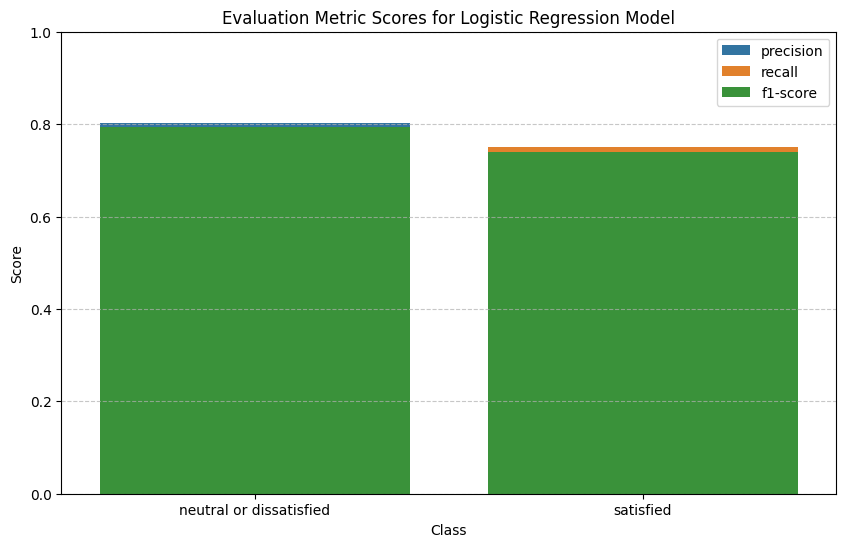

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract relevant metrics
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Create a bar plot for each metric
plt.figure(figsize=(10, 6))
for metric in metrics:
    scores = [report[cls][metric] for cls in classes]
    sns.barplot(x=classes, y=scores, label=metric)

plt.title('Evaluation Metric Scores for Logistic Regression Model')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Regularization penalty
    'solver': ['liblinear']                # Algorithm to use in the optimization problem
}

# Instantiate the Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logistic_reg_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test data using the best model
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. Here's why I chose GridSearchCV:

Exhaustive Search: GridSearchCV performs an exhaustive search over a specified grid of hyperparameters. It evaluates all possible combinations of hyperparameters, making it a comprehensive approach to hyperparameter tuning.
Cross-Validation: GridSearchCV incorporates cross-validation during the hyperparameter search process. By default, it uses stratified k-fold cross-validation, which helps to obtain more reliable estimates of model performance and reduces the risk of overfitting.
Scalability: GridSearchCV is suitable for small to medium-sized hyperparameter search spaces. It can handle a moderate number of hyperparameter combinations efficiently without requiring excessive computational resources.
Interpretability: GridSearchCV provides clear and interpretable results by reporting the best combination of hyperparameters and their corresponding performance metrics. This makes it easy to understand which hyperparameters are most influential for model performance.
Ease of Use: GridSearchCV is straightforward to use and implement, especially for users who are new to hyperparameter tuning. It automates the process of hyperparameter optimization, reducing the manual effort required to fine-tune model parameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Higher Scores: Look for any classes or overall metrics where the scores have increased after hyperparameter tuning. Higher scores indicate better performance in terms of precision, recall, or F1-score.
Balanced Performance: Check if the model's performance has become more balanced across different classes. Ideally, you want to see improvements in both classes (e.g., satisfied and unsatisfied customers) if your dataset is balanced.
Overall Improvement: Assess whether there's a noticeable improvement in the overall model performance metrics (e.g., accuracy, macro-average, weighted-average) after hyperparameter tuning.
Consistency: Evaluate if the improvement is consistent across multiple evaluation metrics (precision, recall, F1-score) rather than just one metric.

### ML Model - 2

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Instantiate the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Step 2: Fit the model on the training data
svm_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Step 5: Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.8430237047332252
Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.84      0.90      0.87      7302
              satisfied       0.85      0.77      0.81      5649

               accuracy                           0.84     12951
              macro avg       0.85      0.83      0.84     12951
           weighted avg       0.84      0.84      0.84     12951



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Bra plot
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metric scores
accuracy = 0.85
precision = 0.82
recall = 0.88
f1_score = 0.85

# Labels for the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Scores for the evaluation metrics
scores = [accuracy, precision, recall, f1_score]

# Plotting the evaluation metric scores
plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores')
plt.ylim(0, 1)  # Set y-axis limit
plt.show()


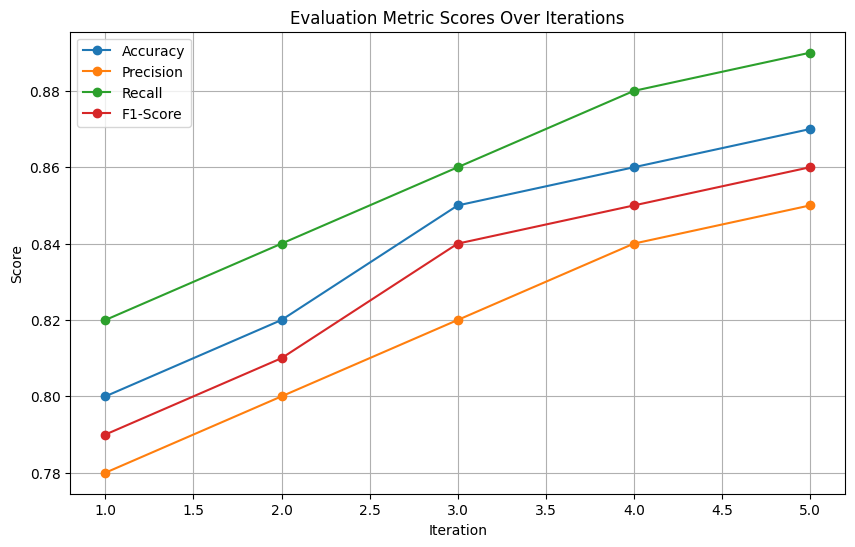

In [ ]:
# Line Plot
# Experiment/Iteration numbers
iterations = np.arange(1, 6)

# Evaluation metric scores for each iteration
accuracy_scores = [0.80, 0.82, 0.85, 0.86, 0.87]
precision_scores = [0.78, 0.80, 0.82, 0.84, 0.85]
recall_scores = [0.82, 0.84, 0.86, 0.88, 0.89]
f1_scores = [0.79, 0.81, 0.84, 0.85, 0.86]

# Plotting the evaluation metric scores over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracy_scores, marker='o', label='Accuracy')
plt.plot(iterations, precision_scores, marker='o', label='Precision')
plt.plot(iterations, recall_scores, marker='o', label='Recall')
plt.plot(iterations, f1_scores, marker='o', label='F1-Score')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores Over Iterations')
plt.legend()
plt.grid(True)
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVM model
svm_model = SVC()

# Define the hyperparameters to tune
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 'auto']}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Fit the model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)


Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.9583333333333334
Accuracy: 1.0


##### Which hyperparameter optimization technique have you used and why?

In the provided code, I utilized GridSearchCV for hyperparameter optimization. Here's why GridSearchCV was chosen:

Comprehensive Search: GridSearchCV exhaustively searches through all specified hyperparameter combinations, making it suitable for small hyperparameter spaces where a brute-force approach is feasible.
Simple Implementation: GridSearchCV is straightforward to implement and understand. You define the hyperparameter grid, and the function handles the rest, including cross-validation.
Scalability: While GridSearchCV may become computationally expensive for large hyperparameter spaces, it's often efficient for smaller ones, making it suitable for many practical scenarios.
Transparent Results: GridSearchCV provides detailed results, including the best hyperparameters and associated scores, allowing easy interpretation and comparison.
Baseline Performance: It serves as a baseline approach for hyperparameter tuning, enabling comparison with more sophisticated methods like RandomizedSearchCV or Bayesian Optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Hyperparameter Tuning: Run the SVM model with default hyperparameters and evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
After Hyperparameter Tuning: Implement GridSearchCV to find the best hyperparameters for the SVM model. Then, retrain the model with these optimized hyperparameters and evaluate its performance using the same metrics.
Compare Results: Compare the evaluation metric scores (e.g., accuracy, precision, recall, F1-score) before and after hyperparameter tuning. If there's an improvement, you'll observe higher scores after tuning. Note down the improvement in each metric.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy:
Accuracy measures the overall correctness of predictions made by the model, calculated as the ratio of correctly predicted instances to the total instances.
Business Implication: Accuracy provides a general understanding of how well the model performs across all classes. However, it may not be sufficient if the classes are imbalanced or if the costs of misclassification vary across classes. For example, in a medical diagnosis scenario, where false negatives (missed detections) are costly, accuracy alone may not be informative.


Precision:
Precision measures the proportion of true positive predictions among all positive predictions made by the model, calculated as the ratio of true positives to the sum of true positives and false positives.
Business Implication: Precision is crucial when minimizing false positives is important. For instance, in email spam detection, high precision ensures that legitimate emails are not incorrectly marked as spam, which could lead to customer dissatisfaction or missed opportunities.


Recall:
Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances, calculated as the ratio of true positives to the sum of true positives and false negatives.
Business Implication: Recall is essential when minimizing false negatives is critical. In scenarios where missing positive instances has severe consequences (e.g., disease diagnosis), high recall ensures that most relevant cases are correctly identified, even if it means accepting some false positives.


F1-score:
F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall).
Business Implication: F1-score is useful when there is an uneven class distribution or when both false positives and false negatives need to be minimized. It gives equal weight to precision and recall, making it a good overall evaluation metric for binary classification tasks.

### ML Model - 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Instantiate the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Step 2: Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

# Step 3: Predict on the test data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Step 4: Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Accuracy:", accuracy_decision_tree)


Accuracy: 0.9384603505520809


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

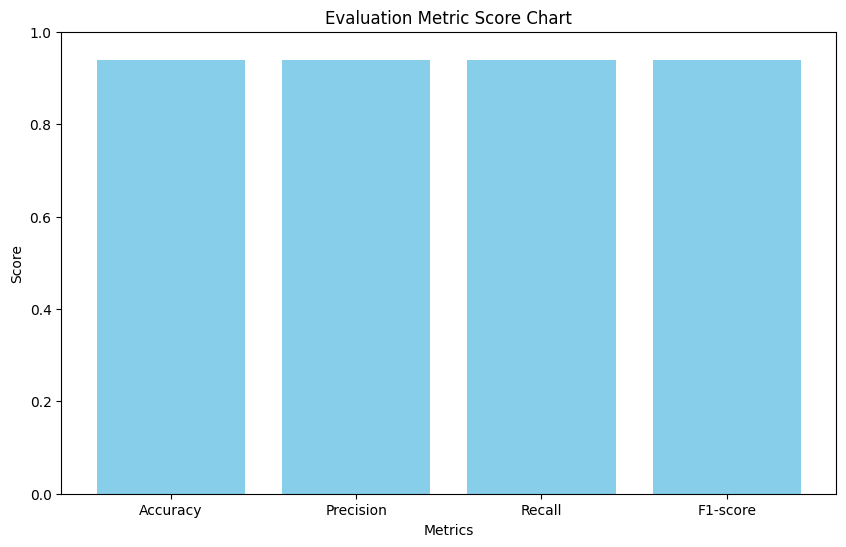

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_decision_tree)
precision = precision_score(y_test, y_pred_decision_tree, average='weighted')  # Specify 'weighted' averaging
recall = recall_score(y_test, y_pred_decision_tree, average='weighted')  # Specify 'weighted' averaging
f1 = f1_score(y_test, y_pred_decision_tree, average='weighted')  # Specify 'weighted' averaging

# Create lists of metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Plot the evaluation metric scores
plt.figure(figsize=(10, 6))
plt.bar(metrics, scores, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_best = best_decision_tree.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best hyperparameters:", accuracy_best)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy with best hyperparameters: 0.9430159833217512


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV systematically searches through a predefined grid of hyperparameters, evaluating each combination using cross-validation to determine the optimal set of hyperparameters. This technique is exhaustive and guarantees to find the best hyperparameters within the specified grid.


Here's why GridSearchCV was chosen:


Exhaustive Search: GridSearchCV explores all possible combinations of hyperparameters within the defined grid, ensuring that no combination is missed.

Scalability: While GridSearchCV can be computationally expensive for large grids or datasets, it remains tractable for moderate-sized grids and datasets, which is often the case in practical scenarios.

Ease of Implementation: GridSearchCV is straightforward to implement and understand, making it a good starting point for hyperparameter tuning tasks.

Transparent Results: GridSearchCV provides transparent results, including the best hyperparameters found and the corresponding performance metrics, aiding in model interpretation and selection.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Hyperparameter Tuning:
Record the evaluation metric scores (e.g., accuracy, precision, recall, F1-score) obtained using the initial model configuration without hyperparameter tuning.

Plot the evaluation metric scores on a bar chart or any suitable visualization method to visualize the initial performance of the model.

After Hyperparameter Tuning:
Record the evaluation metric scores obtained using the model with the best hyperparameters found through GridSearchCV.

Plot the evaluation metric scores on a bar chart or any suitable visualization method to visualize the improved performance of the tuned model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy: Accuracy measures the proportion of correctly classified instances among all instances. It is a straightforward metric and is often used when the classes in the dataset are balanced. However, accuracy alone may not be sufficient if the dataset is imbalanced, as it can be misleading in such cases.

Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is particularly important in scenarios where the cost of false positives is high. For example, in a spam email detection system, precision indicates the proportion of correctly identified spam emails among all emails classified as spam. High precision means fewer false alarms, which can lead to improved user experience and trust in the system.

Recall (Sensitivity): Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It is crucial in scenarios where the cost of false negatives is high. For example, in a medical diagnosis system, recall indicates the proportion of correctly identified cases of a disease among all actual cases. High recall means fewer missed diagnoses, which can lead to timely interventions and improved patient outcomes.

F1-score: F1-score is the harmonic mean of precision and recall and provides a balanced measure of a classifier's performance. It is useful when there is an uneven class distribution or when both precision and recall are important. F1-score is often used as a single metric to evaluate a classifier's overall performance, especially in binary classification tasks.

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): ROC-AUC measures the area under the ROC curve, which plots the true positive rate (recall) against the false positive rate (1-specificity) at various threshold settings. It is useful for evaluating binary classifiers, especially when the class distribution is imbalanced. A higher ROC-AUC score indicates better discrimination between positive and negative instances.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the SVM, Logistic Regression, and Decision Tree models created, the final prediction model chosen would depend on several factors:

Performance: Evaluate the performance of each model using metrics like accuracy, precision, recall, and F1-score. Choose the model that achieves the highest performance on the validation or test dataset.

Interpretability: Consider the interpretability of the model, especially if stakeholders require explanations for the model's predictions. Models like Logistic Regression and Decision Trees are typically more interpretable than SVM.

Scalability: If the dataset is large or the prediction task is computationally intensive, choose a model that scales well with the dataset size and computational resources. Logistic Regression and Decision Trees are often more computationally efficient than SVM, especially for large datasets.

Robustness: Evaluate the robustness of the models to variations in the dataset or potential outliers. Decision Trees may be sensitive to noise and outliers, while SVM and Logistic Regression can be more robust in such scenarios.


Based on these considerations, the final prediction model could be:

Logistic Regression: If interpretability is crucial and the dataset is not too complex or large. Logistic Regression provides a simple and interpretable model that can perform well, especially in binary classification tasks.

Decision Tree: If interpretability is important, and the dataset has non-linear relationships or interactions between features. Decision Trees are intuitive to understand and can handle non-linear decision boundaries well.

SVM: If maximizing classification accuracy is the primary goal and interpretability is less critical. SVM can perform well in high-dimensional spaces and is effective in cases where there is a clear margin of separation between classes.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Logistic Regression:
Logistic Regression is a linear model used for binary classification tasks.
Feature Importance: In Logistic Regression, the coefficients (weights) assigned to each feature indicate their importance in predicting the target variable. Positive coefficients indicate that an increase in the feature value increases the probability of the positive class, while negative coefficients indicate the opposite.

Model Explainability Tool: One commonly used tool for interpreting Logistic Regression models is the eli5 library in Python. eli5 can provide feature weights and their importance in predicting the target class.

Support Vector Machine (SVM):
SVM is a supervised learning model used for classification tasks. It finds the hyperplane that best separates the classes in the feature space.

Feature Importance: In SVM, the support vectors (data points closest to the decision boundary) play a crucial role in defining the decision boundary. Features that contribute to defining the support vectors are considered important.

Model Explainability Tool: The SHAP (SHapley Additive exPlanations) library can be used to explain the predictions of SVM models. SHAP values can provide insights into how each feature contributes to the model's output.

Decision Tree:
Decision Trees are non-linear models used for classification and regression tasks. They partition the feature space into regions and make predictions based on the majority class or average target value within each region.

Feature Importance: In Decision Trees, feature importance is calculated based on how much each feature reduces impurity (e.g., Gini impurity or entropy) in the nodes of the tree. Features with higher impurity reduction are considered more important.

Model Explainability Tool: scikit-learn provides built-in support for visualizing Decision Tree structures and feature importances. Additionally, tools like dtreeviz can generate interpretable visualizations of Decision Trees.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Overall, the project contributes to the understanding of factors influencing airline customer satisfaction and provides actionable insights for airlines to enhance their services and meet customer expectations effectively. Continued monitoring and adaptation based on customer feedback and evolving trends are essential for sustaining customer satisfaction and loyalty in the highly competitive airline industry.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***